In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import expon, chi2, uniform, chisquare, normaltest, norm
import matplotlib.pyplot as plt
import seaborn as sns

# **Men's refueling time**

     data          zi         ucl         lcl
0   150.0  189.847826  230.071165  158.479560
1   140.0  184.863043  242.433689  146.117036
2   150.0  181.376739  250.488450  138.062274
3   120.0  175.239065  256.250096  132.300629
4   300.0  187.715159  260.550865  127.999860
..    ...         ...         ...         ...
64  270.0  218.990627  276.396519  112.154206
65  285.0  225.591564  276.396528  112.154197
66  125.0  215.532408  276.396535  112.154190
67  690.0  262.979167  276.396540  112.154184
68   75.0  244.181250  276.396545  112.154180

[69 rows x 4 columns]


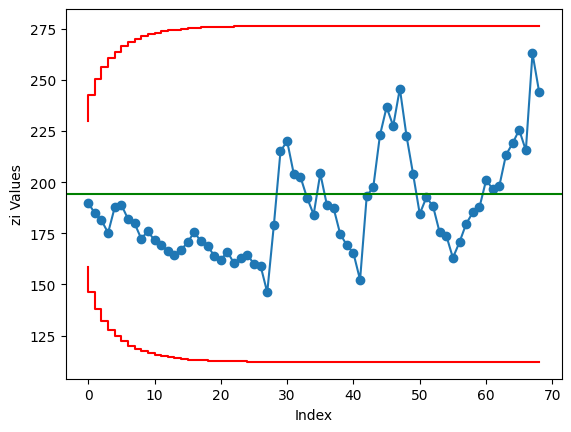

In [ ]:

excel_file_path = '/content/EWMA-Data-man-refulaing-time.xlsx'

df = pd.read_excel(excel_file_path)

data = df.to_numpy()

lam = 0.1
L = 2.7
mu0 = df['Data'].mean()
sigma0 = df['Data'].std()

data = data.astype(float)

data[0][1] = lam * data[0][0] + (1-lam) * mu0
for i in range(1, len(data)):
    data[i][1] = lam * data[i][0] + (1-lam) * data[i-1][1]

for i in range(len(data)):
  data[i][2] = mu0 + (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))
  data[i][3] = mu0 - (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))

df = pd.DataFrame(data)
df.columns = ["data", "zi", "ucl", "lcl"]

print(df)

plt.plot(df["zi"], label="zi", marker='o')
plt.step(df.index, df["ucl"], color='red')
plt.step(df.index, df["lcl"], color='red')
plt.axhline(y=mu0, color='green')
plt.xlabel("Index")
plt.ylabel("zi Values")
plt.show()

Chi-square statistic: 15.447724958497526
Degrees of freedom: 8
Critical value (alpha=0.05): 16.170775613603467
P-value: 0.05100252911248271
Fail to reject the null hypothesis. The data follows a exponential distribution with mean 194.2753623188406.


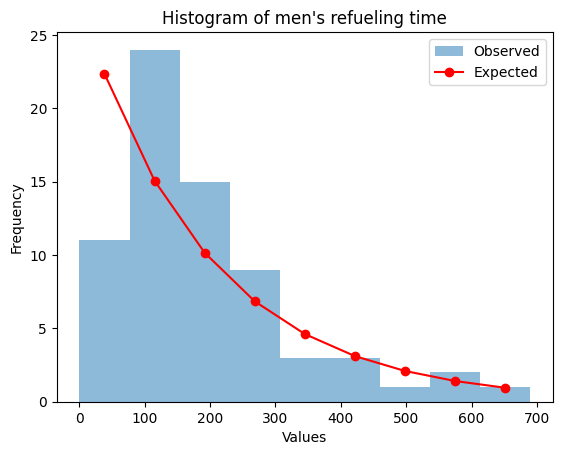

In [ ]:

data = [
    150, 140, 150, 120, 300, 200, 120, 160, 105, 210,
    130, 150, 140, 145, 190, 205, 220, 130, 150, 120,
    145, 200, 110, 185, 180, 120, 150, 30,  475,
    540, 265, 60,  190, 100,  110, 385,
    50, 175, 60, 120, 130, 35, 560, 240, 450, 360,
    145, 410, 15, 35, 10, 265, 150, 60, 160, 65,
    240, 260, 235, 210, 320, 160, 210, 350, 270, 285,
    125, 690, 75
]

# Step 1: Divide data into intervals (bins)
# You can customize the number of bins and range based on your data
bins = np.linspace(0, max(data), 10)

# Step 2: Calculate Expected Frequencies
observed, _ = np.histogram(data, bins=bins)
lambda_param = 1 / np.mean(data)  # Estimate lambda parameter for the exponential distribution
expected = len(data) * np.diff(bins) * expon.pdf((bins[:-1] + bins[1:]) / 2, scale=1/lambda_param)

# Step 3: Compute Observed and Expected Frequencies
chi2_statistic = np.sum((observed - expected)**2 / expected)

# Step 4: Degrees of Freedom
df = len(bins) - 2  # df = k - p - 1, where k is the number of bins and p is the number of parameters (1 for lambda)

# Step 5: Compare with Critical Value or P-value
chi2_critical = chi2.ppf(0.96, df)  # Critical value for a 95% confidence level
p_value = 1 - chi2.cdf(chi2_statistic, df)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"Degrees of freedom: {df}")
print(f"Critical value (alpha=0.05): {chi2_critical}")
print(f"P-value: {p_value}")
# Interpret the results

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a uniform distribution.")
else:
    print(f"Fail to reject the null hypothesis. The data follows a exponential distribution with mean {1/lambda_param}.")

# Step 6: Visualize the observed and expected frequencies
plt.hist(data, bins=bins, alpha=0.5, label='Observed')
plt.plot((bins[:-1] + bins[1:]) / 2, expected, 'ro-', label='Expected')
plt.title("Histogram of men's refueling time")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Women's refueling time**

     data          zi         ucl         lcl
0   180.0  195.750000  208.188404  186.811596
1   190.0  195.175000  211.879777  183.120223
2   250.0  200.657500  214.284878  180.715122
3   220.0  202.591750  216.005270  178.994730
4   140.0  196.332575  217.289452  177.710548
5   180.0  194.699318  218.271522  176.728478
6   250.0  200.229386  219.034192  175.965808
7   180.0  198.206447  219.632699  175.367301
8   150.0  193.385802  220.105876  174.894124
9   195.0  193.547222  220.482009  174.517991
10  170.0  191.192500  220.782222  174.217778
11  210.0  193.073250  221.022587  173.977413
12  130.0  186.765925  221.215496  173.784504
13  150.0  183.089332  221.370610  173.629390
14  230.0  187.780399  221.495518  173.504482
15  190.0  188.002359  221.596218  173.403782
16  195.0  188.702123  221.677478  173.322522
17  265.0  196.331911  221.743098  173.256902
18  220.0  198.698720  221.796121  173.203879
19  255.0  204.328848  221.838985  173.161015


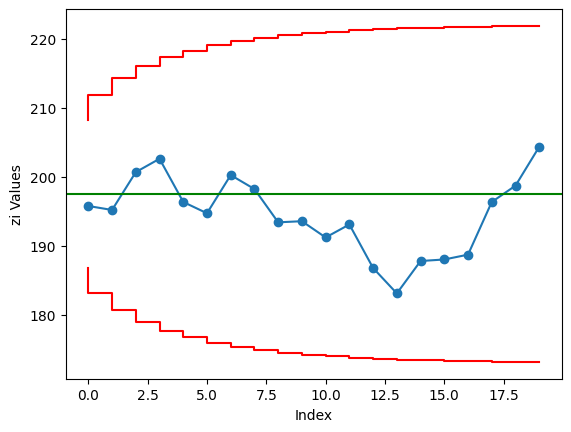

In [ ]:

excel_file_path = '/content/EWMA-Data-womem-refulaing-time.xlsx'

df = pd.read_excel(excel_file_path)

data = df.to_numpy()

lam = 0.1
L = 2.7
mu0 = df['Data'].mean()
sigma0 = df['Data'].std()

data = data.astype(float)

data[0][1] = lam * data[0][0] + (1-lam) * mu0
for i in range(1, len(data)):
    data[i][1] = lam * data[i][0] + (1-lam) * data[i-1][1]

for i in range(len(data)):
  data[i][2] = mu0 + (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))
  data[i][3] = mu0 - (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))

df = pd.DataFrame(data)
df.columns = ["data", "zi", "ucl", "lcl"]

print(df)

plt.plot(df["zi"], label="zi", marker='o')
plt.step(df.index, df["ucl"], color='red')
plt.step(df.index, df["lcl"], color='red')
plt.axhline(y=mu0, color='green')
plt.xlabel("Index")
plt.ylabel("zi Values")
plt.show()

Chi-square statistic: 5.947368421052633
P-value: 0.31137394078826547
Fail to reject the null hypothesis. The data follows a uniform distribution  between 130 and 265.


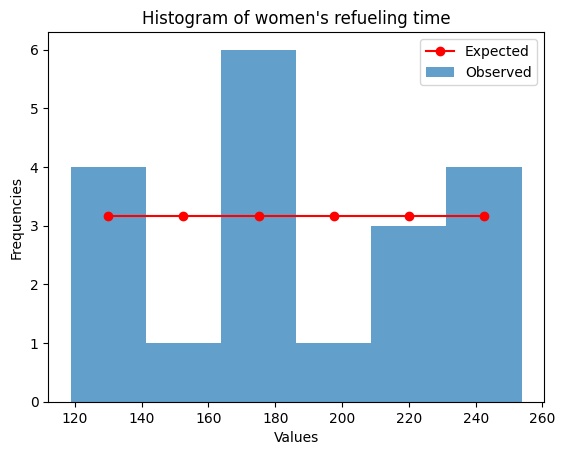

In [ ]:

# Load the data from the Excel file
excel_file_path = '/content/woman-refulaing-time.xlsx'
data = pd.read_excel(excel_file_path)

# Set the parameters for the uniform distribution dynamically
lower_bound = 130
upper_bound = 265
# Perform the goodness-of-fit test using the chi-square test
observed_frequencies, bins = np.histogram(data, bins='auto')
expected_frequencies = np.ones_like(observed_frequencies) * len(data) / len(observed_frequencies)

chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Print the results of the test
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a uniform distribution.")
else:
    print(f"Fail to reject the null hypothesis. The data follows a uniform distribution  between {lower_bound} and {upper_bound}.")

# Visualize the observed and expected frequencies
plt.bar(bins[:-1], observed_frequencies, width=np.diff(bins), alpha=0.7, label='Observed')
plt.plot(bins[:-1], expected_frequencies, 'r-', label='Expected', marker='o')

plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title("Histogram of women's refueling time")
plt.legend()
plt.show()


# **Duration between two entries**

     data         zi        ucl        lcl
0    15.0  29.510204  38.730637  23.514261
1    65.0  33.059184  41.358219  20.886679
2    90.0  38.753265  43.070211  19.174687
3    10.0  35.877939  44.294815  17.950083
4    15.0  33.790145  45.208918  17.035980
5    95.0  39.911130  45.907972  16.336926
6    25.0  38.420017  46.450854  15.794044
7    70.0  41.578016  46.876881  15.368017
8    15.0  38.920214  47.213696  15.031202
9    15.0  36.528193  47.481434  14.763464
10    5.0  33.375373  47.695131  14.549767
11    5.0  30.537836  47.866227  14.378671
12   10.0  28.484052  48.003543  14.241355
13   40.0  29.635647  48.113956  14.130942
14   25.0  29.172082  48.202867  14.042031
15    5.0  26.754874  48.274547  13.970351
16   60.0  30.079387  48.332389  13.912509
17    5.0  27.571448  48.379099  13.865799
18   25.0  27.314303  48.416842  13.828056
19   35.0  28.082873  48.447353  13.797545
20   15.0  26.774586  48.472028  13.772870
21   30.0  27.097127  48.491989  13.752909
22   10.0  

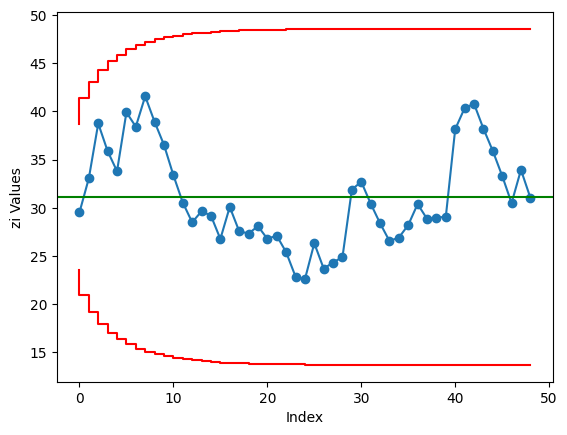

In [ ]:

excel_file_path = '/content/EWMA-Data-Duration between two entries.xlsx'

df = pd.read_excel(excel_file_path)

data = df.to_numpy()

lam = 0.1
L = 2.7
mu0 = df['Data'].mean()
sigma0 = df['Data'].std()

data = data.astype(float)

data[0][1] = lam * data[0][0] + (1-lam) * mu0
for i in range(1, len(data)):
    data[i][1] = lam * data[i][0] + (1-lam) * data[i-1][1]

for i in range(len(data)):
  data[i][2] = mu0 + (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))
  data[i][3] = mu0 - (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))

df = pd.DataFrame(data)
df.columns = ["data", "zi", "ucl", "lcl"]

print(df)

plt.plot(df["zi"], label="zi", marker='o')
plt.step(df.index, df["ucl"], color='red')
plt.step(df.index, df["lcl"], color='red')
plt.axhline(y=mu0, color='green')
plt.xlabel("Index")
plt.ylabel("zi Values")
plt.show()

Chi-square statistic: 4.08182894287898
Degrees of freedom: 8
Critical value (alpha=0.05): 15.50731305586545
P-value: 0.8496660832476532
Fail to reject the null hypothesis. The data follows an exponential distribution with mean 31.12244897959184.


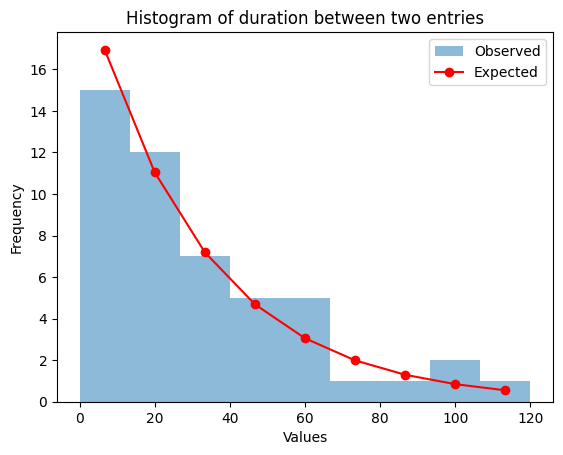

In [ ]:

# Load the data from the Excel file
excel_file_path = '/content/between_arrival_duration.xlsx'
data = pd.read_excel(excel_file_path, header=None)[0].tolist()

# Step 1: Divide data into intervals (bins)
bins = np.linspace(0, max(data), 10)

# Step 2: Calculate Expected Frequencies
observed, _ = np.histogram(data, bins=bins)
lambda_param = 1 / np.mean(data)  # Estimate lambda parameter for the exponential distribution
expected = len(data) * np.diff(bins) * expon.pdf((bins[:-1] + bins[1:]) / 2, scale=1/lambda_param)

# Step 3: Compute Observed and Expected Frequencies
chi2_statistic = np.sum((observed - expected)**2 / expected)

# Step 4: Degrees of Freedom
df = len(bins) - 2  # df = k - p - 1, where k is the number of bins and p is the number of parameters (1 for lambda)

# Step 5: Compare with Critical Value or P-value
chi2_critical = chi2.ppf(0.95, df)  # Critical value for a 95% confidence level
p_value = 1 - chi2.cdf(chi2_statistic, df)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"Degrees of freedom: {df}")
print(f"Critical value (alpha=0.05): {chi2_critical}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow an exponential distribution.")
else:
    print(f"Fail to reject the null hypothesis. The data follows an exponential distribution with mean {1/lambda_param}.")

# Step 6: Visualize the observed and expected frequencies
plt.hist(data, bins=bins, alpha=0.5, label='Observed')
plt.plot((bins[:-1] + bins[1:]) / 2, expected, 'ro-', label='Expected')
plt.title("Histogram of duration between two entries")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Payment duration**

    data         zi        ucl        lcl
0   30.0  24.600000  26.272389  21.727611
1   30.0  25.140000  27.057186  20.942814
2   30.0  25.626000  27.568518  20.431482
3   15.0  24.563400  27.934279  20.065721
4   20.0  24.107060  28.207300  19.792700
5   20.0  23.696354  28.416092  19.583908
6   20.0  23.326719  28.578238  19.421762
7   10.0  21.994047  28.705482  19.294518
8   20.0  21.794642  28.806081  19.193919
9   25.0  22.115178  28.886048  19.113952
10  30.0  22.903660  28.949874  19.050126
11  15.0  22.113294  29.000977  18.999023
12  30.0  22.901965  29.041990  18.958010
13  20.0  22.611768  29.074968  18.925032
14  40.0  24.350591  29.101523  18.898477
15  10.0  22.915532  29.122933  18.877067
16  15.0  22.123979  29.140209  18.859791
17  25.0  22.411581  29.154160  18.845840
18  20.0  22.170423  29.165433  18.834567
19  30.0  22.953381  29.174546  18.825454
20  35.0  24.158043  29.181915  18.818085
21  40.0  25.742238  29.187877  18.812123
22  30.0  26.168015  29.192701  18

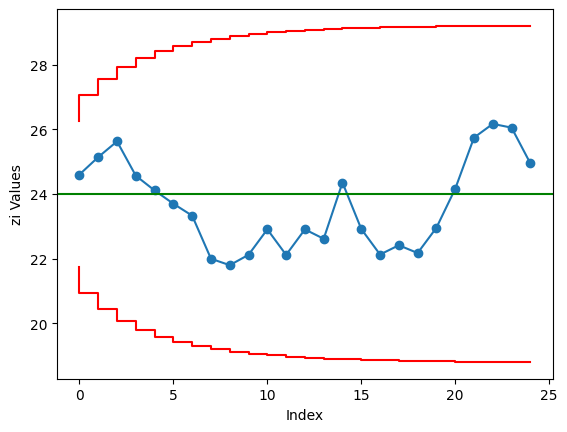

In [ ]:

excel_file_path = '/content/EWMA-Data-Payment duration.xlsx'

df = pd.read_excel(excel_file_path)

data = df.to_numpy()

lam = 0.1
L = 2.7
mu0 = df['Data'].mean()
sigma0 = df['Data'].std()

data = data.astype(float)

data[0][1] = lam * data[0][0] + (1-lam) * mu0
for i in range(1, len(data)):
    data[i][1] = lam * data[i][0] + (1-lam) * data[i-1][1]

for i in range(len(data)):
  data[i][2] = mu0 + (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))
  data[i][3] = mu0 - (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))

df = pd.DataFrame(data)
df.columns = ["data", "zi", "ucl", "lcl"]

print(df)

plt.plot(df["zi"], label="zi", marker='o')
plt.step(df.index, df["ucl"], color='red')
plt.step(df.index, df["lcl"], color='red')
plt.axhline(y=mu0, color='green')
plt.xlabel("Index")
plt.ylabel("zi Values")
plt.show()

Normality Test Statistic: 0.6814226370041874
P-value: 0.7112642073887423
Fail to reject the null hypothesis. The data follows a normal distribution with mean and 24.0 variances 70.83333333333333.


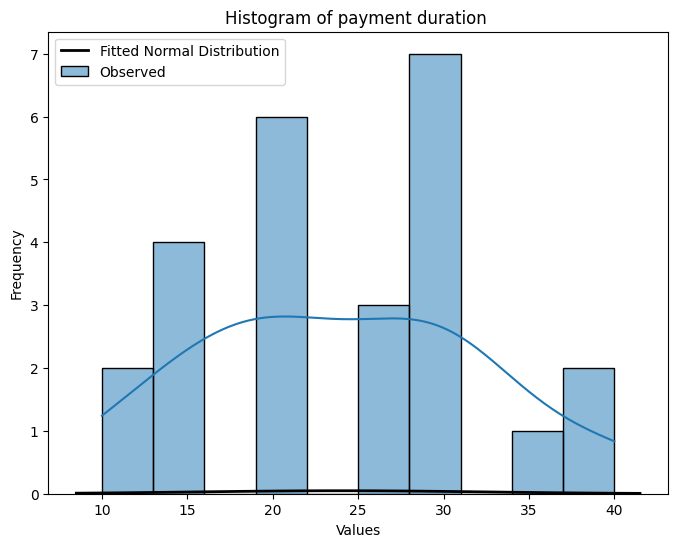

In [ ]:

# Load the data from the Excel file
excel_file_path = '/content/payment_duration.xlsx'
data = pd.read_excel(excel_file_path, header=None)[0].tolist()

# Perform the goodness-of-fit test for a normal distribution
statistic, p_value = normaltest(data)

# Print the results of the test
print(f"Normality Test Statistic: {statistic}")
print(f"P-value: {p_value}")

xbar = np.mean(data)
s = np.std(data, ddof=1)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a normal distribution.")
else:
    print(f"Fail to reject the null hypothesis. The data follows a normal distribution with mean and {xbar} variances {s**2}.")

# Visualize the data with a histogram and fitted normal distribution
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, alpha=0.5, bins=10, label='Observed')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, xbar, s)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
plt.title("Histogram of payment duration ")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Departure time**

    data         zi        ucl        lcl
0   30.0  22.071429  23.853255  18.527697
1   30.0  22.864286  24.772879  17.608073
2   10.0  21.577857  25.372057  17.008895
3   15.0  20.920071  25.800654  16.580298
4   25.0  21.328064  26.120580  16.260372
5   45.0  23.695258  26.365241  16.015711
6   30.0  24.325732  26.555244  15.825709
7   35.0  25.393159  26.704348  15.676604
8   25.0  25.353843  26.822230  15.558723
9   25.0  25.318459  26.915935  15.465018
10   5.0  23.286613  26.990726  15.390226
11  20.0  22.957952  27.050608  15.330344
12  10.0  21.662156  27.098667  15.282285
13  20.0  21.495941  27.137310  15.243642
14  15.0  20.846347  27.168428  15.212524
15  20.0  20.761712  27.193515  15.187437
16   5.0  19.185541  27.213759  15.167193
17  20.0  19.266987  27.230107  15.150845
18  15.0  18.840288  27.243317  15.137635
19  25.0  19.456259  27.253995  15.126957
20  20.0  19.510633  27.262631  15.118321


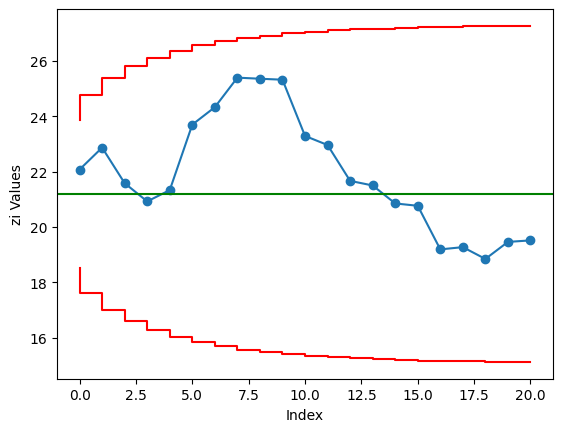

In [ ]:

excel_file_path = '/content/EWMA-Data-Departure time.xlsx'

df = pd.read_excel(excel_file_path)

data = df.to_numpy()

lam = 0.1
L = 2.7
mu0 = df['Data'].mean()
sigma0 = df['Data'].std()

data = data.astype(float)

data[0][1] = lam * data[0][0] + (1-lam) * mu0
for i in range(1, len(data)):
    data[i][1] = lam * data[i][0] + (1-lam) * data[i-1][1]

for i in range(len(data)):
  data[i][2] = mu0 + (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))
  data[i][3] = mu0 - (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))

df = pd.DataFrame(data)
df.columns = ["data", "zi", "ucl", "lcl"]

print(df)

plt.plot(df["zi"], label="zi", marker='o')
plt.step(df.index, df["ucl"], color='red')
plt.step(df.index, df["lcl"], color='red')
plt.axhline(y=mu0, color='green')
plt.xlabel("Index")
plt.ylabel("zi Values")
plt.show()

Normality Test Statistic: 1.0267770512975782
P-value: 0.5984642277277836
Fail to reject the null hypothesis. The data follows a normal distribution with mean and 21.19047619047619 variances 97.26190476190474.


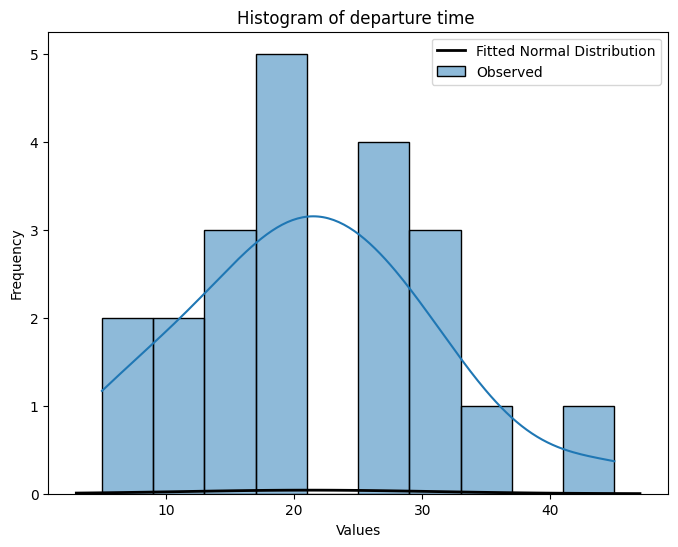

In [ ]:

# Load the data from the Excel file
excel_file_path = '/content/exit_duration.xlsx'
data = pd.read_excel(excel_file_path, header=None)[0].tolist()

# Perform the goodness-of-fit test for a normal distribution
statistic, p_value = normaltest(data)

# Print the results of the test
print(f"Normality Test Statistic: {statistic}")
print(f"P-value: {p_value}")

xbar = np.mean(data)
s = np.std(data, ddof=1)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a normal distribution.")
else:
    print(f"Fail to reject the null hypothesis. The data follows a normal distribution with mean and {xbar} variances {s**2}.")

# Visualize the data with a histogram and fitted normal distribution
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, alpha=0.5, bins=10, label='Observed')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, xbar, s)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
plt.title("Histogram of departure time ")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Amount of fuel consumed**

    data         zi        ucl        lcl
0   29.0  26.642000  29.485367  23.274633
1   23.0  26.277800  30.557843  22.202157
2   24.0  26.050020  31.256612  21.503388
3   20.0  25.445018  31.756448  21.003552
4   39.0  26.800516  32.129549  20.630451
5   41.0  28.220465  32.414876  20.345124
6   36.0  28.998418  32.636459  20.123541
7   33.0  29.398576  32.810347  19.949653
8    9.0  27.358719  32.947822  19.812178
9   24.0  27.022847  33.057102  19.702898
10  37.0  28.020562  33.144325  19.615675
11  20.0  27.218506  33.214159  19.545841
12  32.0  27.696655  33.270207  19.489793
13  11.0  26.026990  33.315273  19.444727
14  32.0  26.624291  33.351563  19.408437
15   4.0  24.361862  33.380820  19.379180
16  25.0  24.425676  33.404429  19.355571
17  30.0  24.983108  33.423494  19.336506
18  34.0  25.884797  33.438899  19.321101
19  53.0  28.596317  33.451352  19.308648
20  33.0  29.036686  33.461424  19.298576
21  30.0  29.133017  33.469571  19.290429
22  17.0  27.919715  33.476163  19

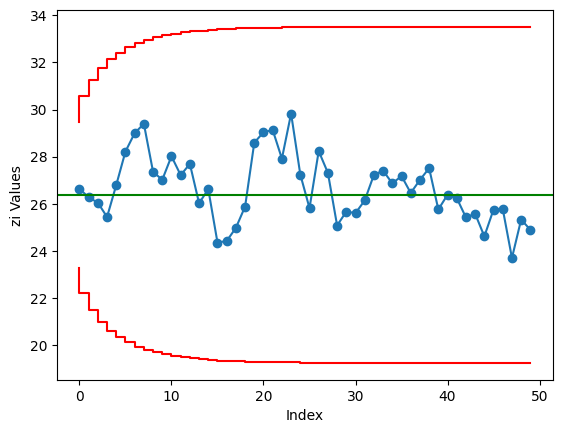

In [ ]:

excel_file_path = '/content/EWMA-Data-Amount of fuel consumed.xlsx'

df = pd.read_excel(excel_file_path)

data = df.to_numpy()

lam = 0.1
L = 2.7
mu0 = df['Data'].mean()
sigma0 = df['Data'].std()

data = data.astype(float)

data[0][1] = lam * data[0][0] + (1-lam) * mu0
for i in range(1, len(data)):
    data[i][1] = lam * data[i][0] + (1-lam) * data[i-1][1]

for i in range(len(data)):
  data[i][2] = mu0 + (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))
  data[i][3] = mu0 - (L*sigma0*((((lam)/(2-lam))*(1-((1-lam)**(2*(i+1)))))**0.5))

df = pd.DataFrame(data)
df.columns = ["data", "zi", "ucl", "lcl"]

print(df)

plt.plot(df["zi"], label="zi", marker='o')
plt.step(df.index, df["ucl"], color='red')
plt.step(df.index, df["lcl"], color='red')
plt.axhline(y=mu0, color='green')
plt.xlabel("Index")
plt.ylabel("zi Values")
plt.show()

Normality Test Statistic: 0.0929635004835885
P-value: 0.9545819813013541
Fail to reject the null hypothesis. The data follows a normal distribution with mean and 26.38 variances 132.2812244897959.


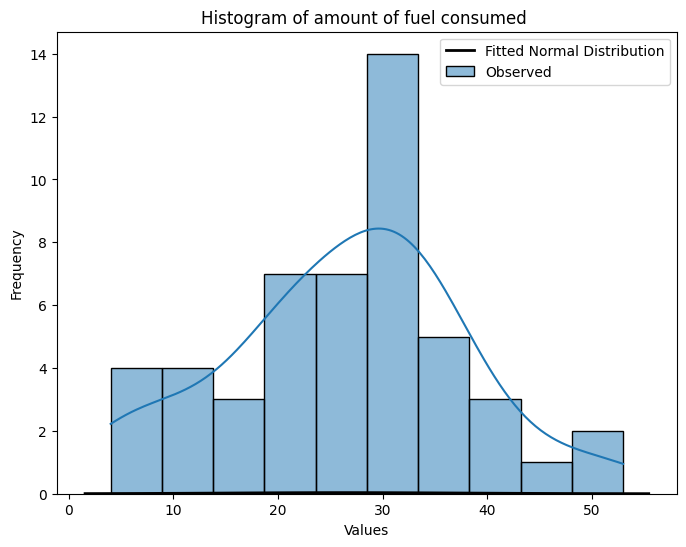

In [ ]:

# Load the data from the Excel file
excel_file_path = '/content/Amount of fuel consumed.xlsx'
data = pd.read_excel(excel_file_path, header=None)[0].tolist()

# Perform the goodness-of-fit test for a normal distribution
statistic, p_value = normaltest(data)

# Print the results of the test
print(f"Normality Test Statistic: {statistic}")
print(f"P-value: {p_value}")

xbar = np.mean(data)
s = np.std(data, ddof=1)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a normal distribution.")
else:
    print(f"Fail to reject the null hypothesis. The data follows a normal distribution with mean and {xbar} variances {s**2}.")

# Visualize the data with a histogram and fitted normal distribution
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, alpha=0.5, bins=10, label='Observed')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, xbar, s)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
plt.title("Histogram of amount of fuel consumed ")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Enter simulation time:28800


<ipython-input-6-9b463e0ab80b>:1600: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['waiting_time_exit'] = filtered_df['exit_time'] - filtered_df['Time to sit in the car']
<ipython-input-6-9b463e0ab80b>:1601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['waiting_time_refueling'] = filtered_df['service_start_time'] - filtered_df['entry_time']
<ipython-input-6-9b463e0ab80b>:1602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

DataFrame has been saved to person_data_final2.xlsx


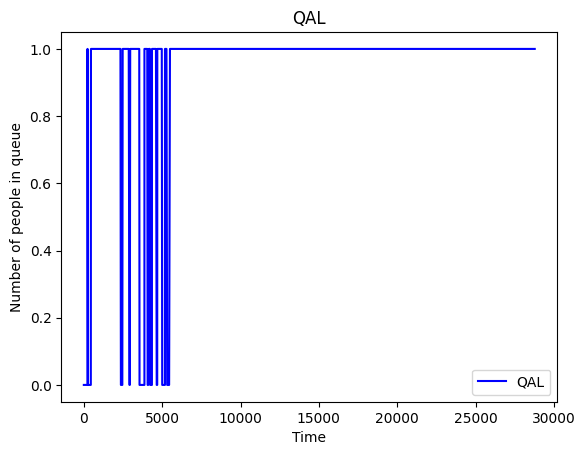

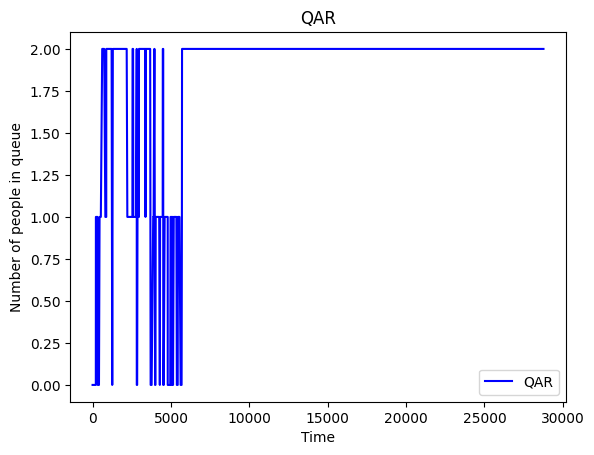

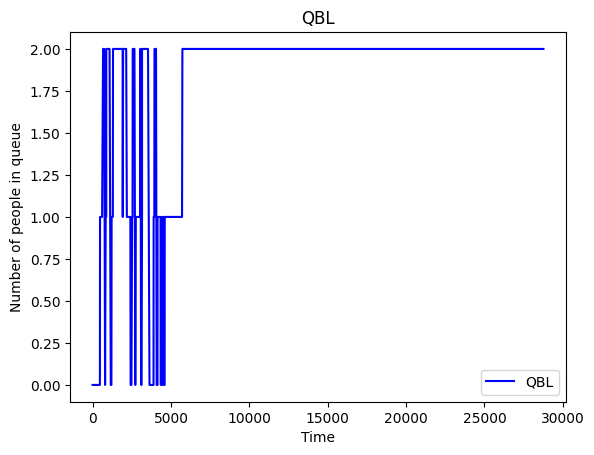

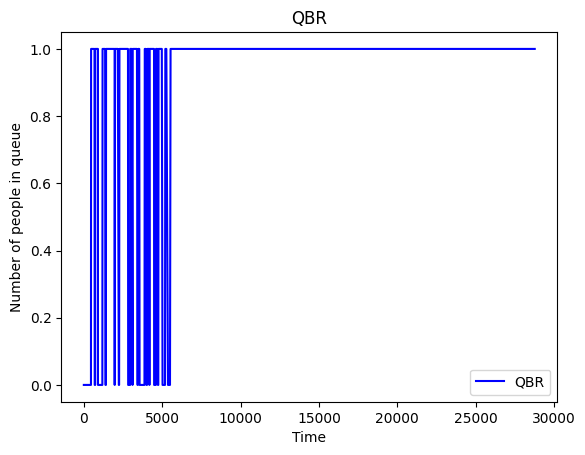

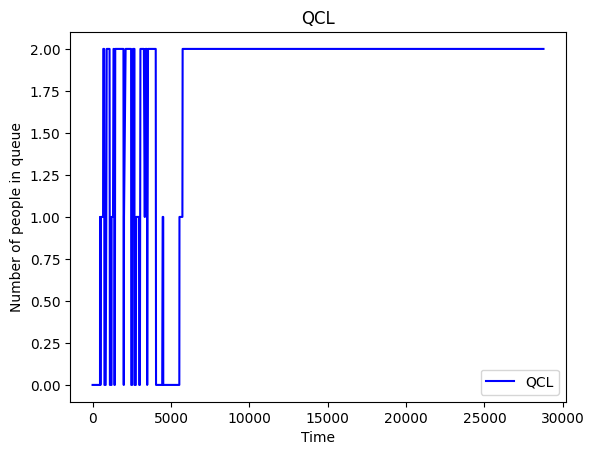

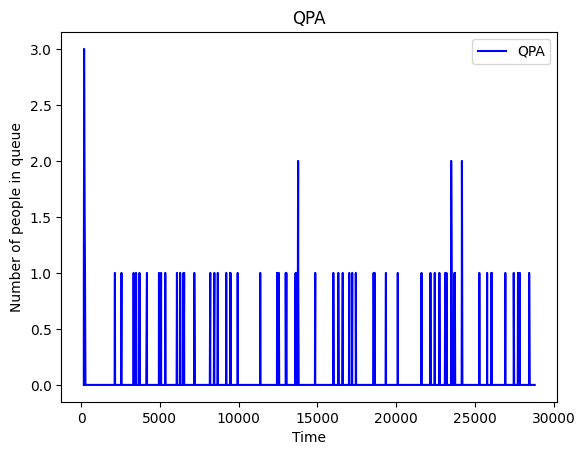

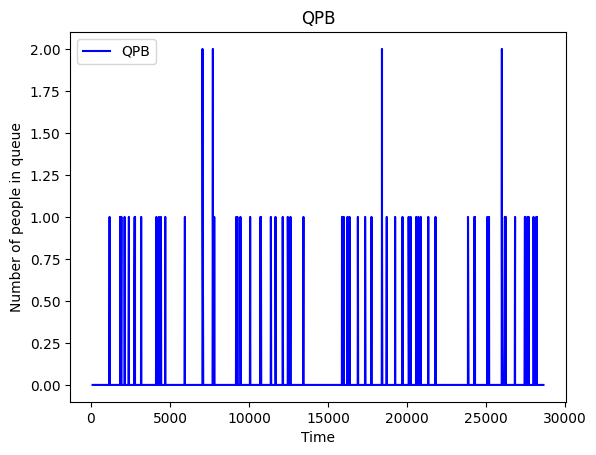

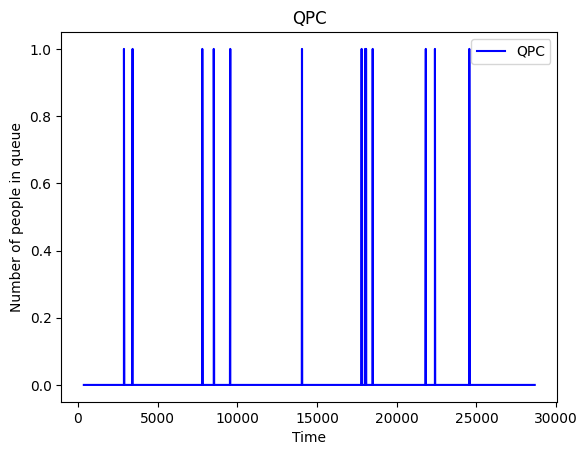

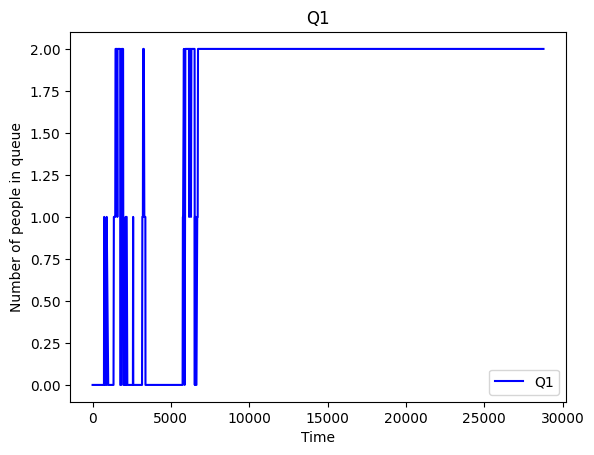

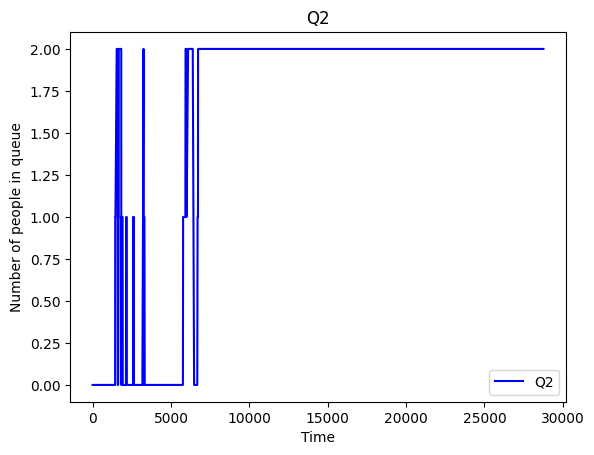

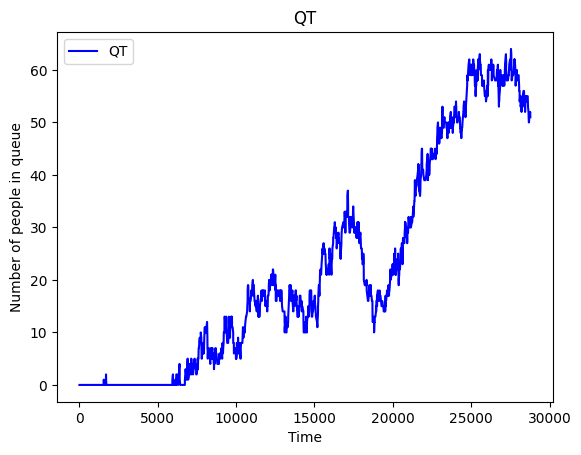

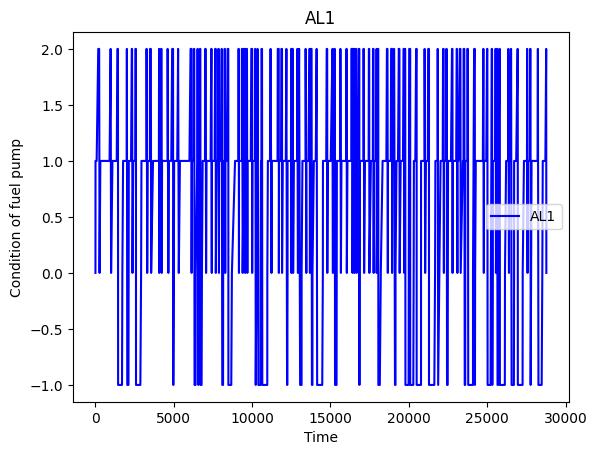

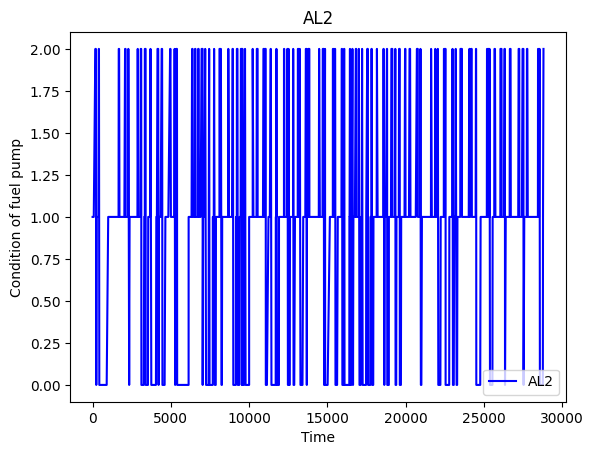

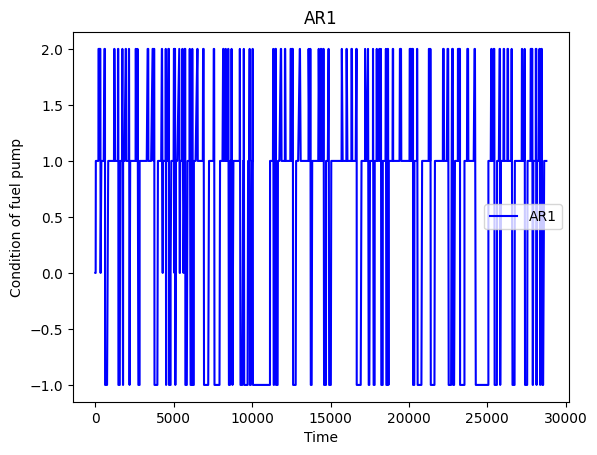

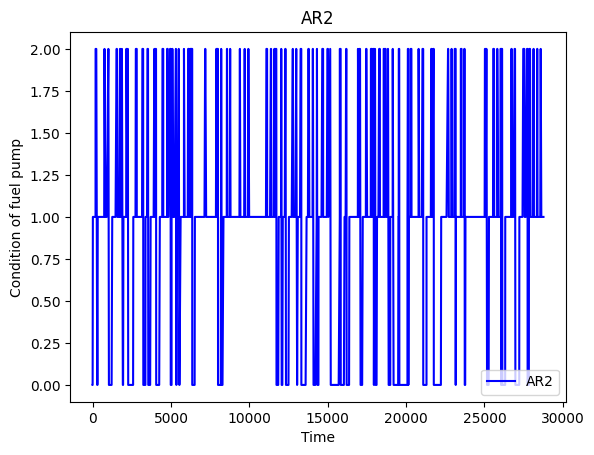

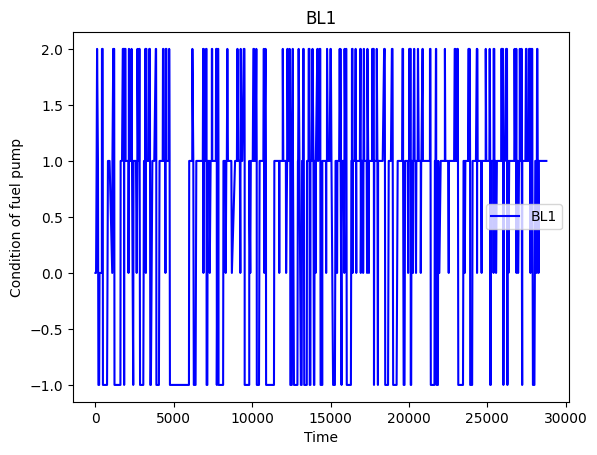

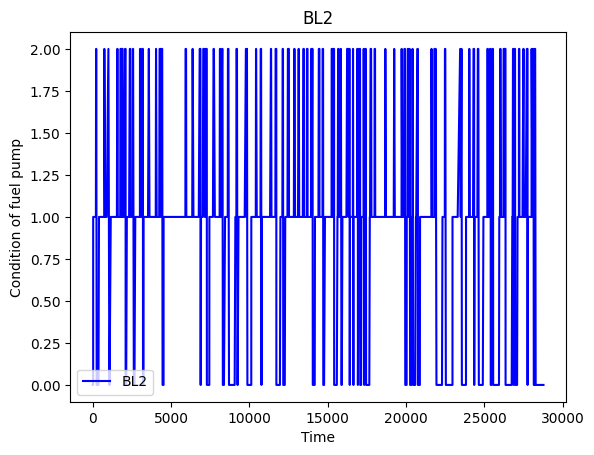

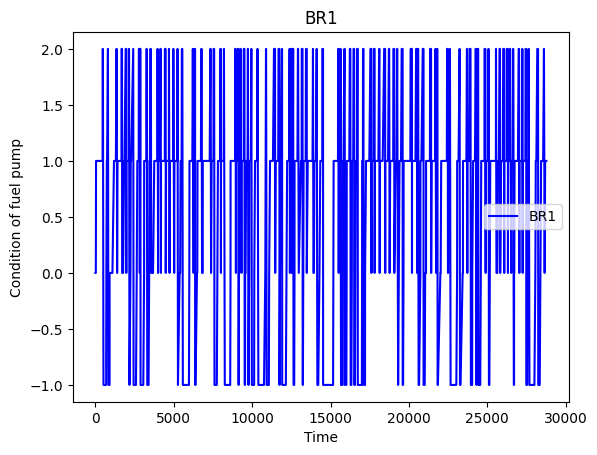

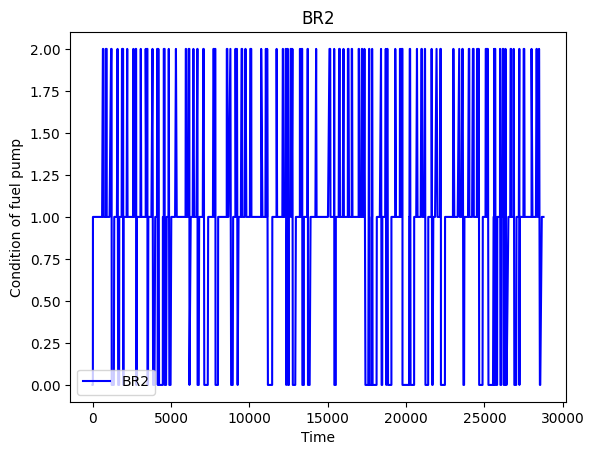

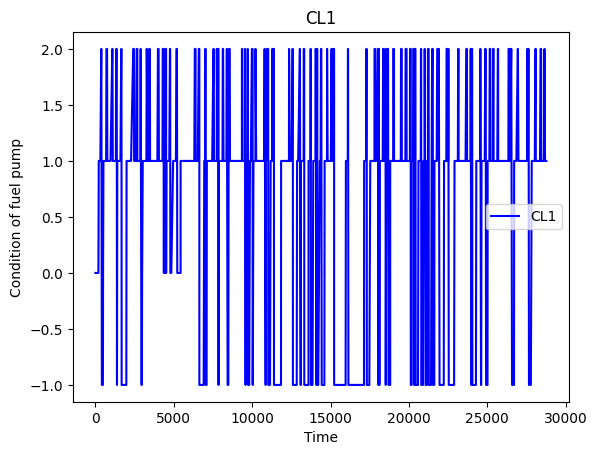

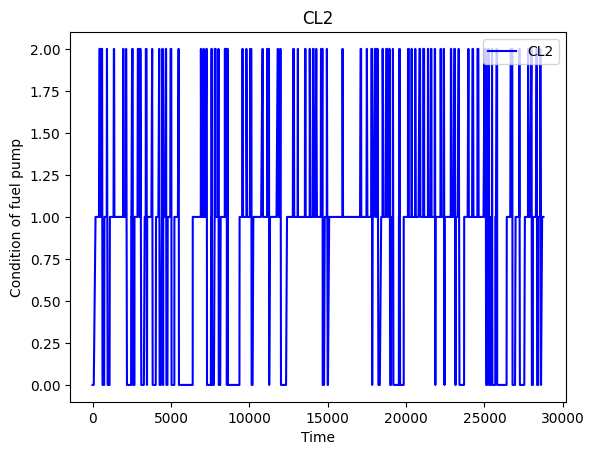

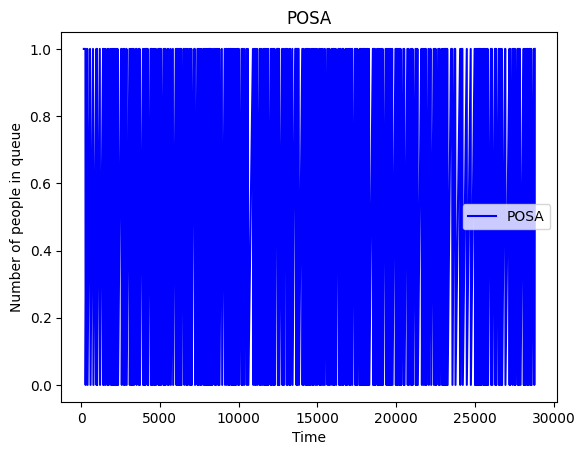

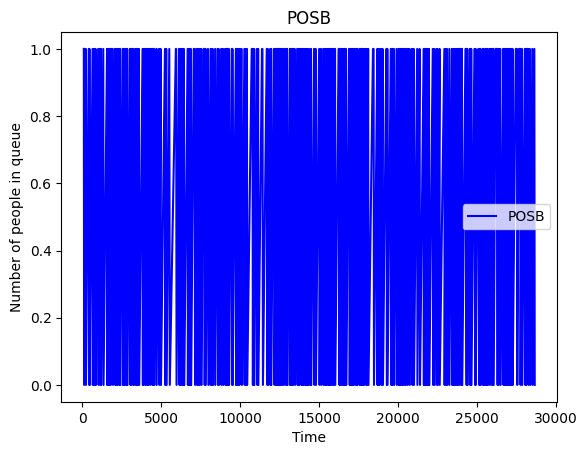

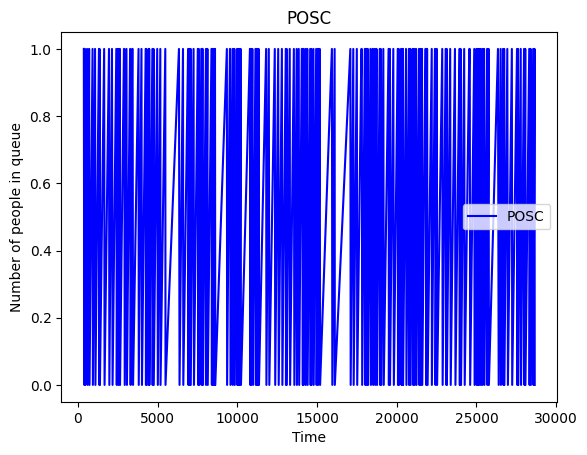

Average Waiting Time for Exit: 40.85666274182431
Average Waiting Time for Refueling: 961.9454951276389
Average Waiting Time for Payment: 2.460476458491948
Average Total Spent Time: 1245.7416753378875
The average length of QAR:  1.8439228732441315
The average length of QAL:  0.945650355949088
The average length of QBR:  0.926007591268664
The average length of QBL:  1.8202238079698838
The average length of QCL:  1.7917900626735324
The average length of QPA:  0.03601584605708619
The average length of QPB:  0.03170677667524268
The average length of QPC:  0.005797297490810338
The average length of Q1:  1.6315534013326753
The average length of Q2:  1.601699598760655
The average length of QT:  22.07966904314997
Total number of people who received service:  864
   refueling pump number  waiting_time_exit  refueling_time  payment_time  \
0                    1.0           0.189939        0.561382      0.069483   
1                    2.0           0.000000        0.595626      0.069835   
2    

In [ ]:
import numpy as np
import pandas as pd
from random import random
import matplotlib.pyplot as plt
from scipy.integrate import trapz

counter = 0
simulation_time = int(input("Enter simulation time:"))
FEL = []
FEL.append((0, 'a', 0)) #time, event, id
w_rate = 0.3

def append_id_to_shortest_list(id, lists):
    # Initialize shortest with the first list
    shortest = lists[0]

    for i in lists[1:]:
        if len(i) < len(shortest):
            shortest = i

    shortest.append(id)


# Determining the capacity of queues
cq1 = 2
cq2 = 2
cqal = 1
cqar = 2
cqbl = 2
cqbr = 1
cqcl = 2

# POS variables
posa = 0
posb = 0
posc = 0
posa_condition = []
posa_condition_time = []
posb_condition = []
posb_condition_time = []
posc_condition = []
posc_condition_time = []
# Edge variables c
cl2 = 0
cl1 = 0
cl2_condition = []
cl2_condition_time = []
cl1_condition = []
cl1_condition_time = []
# Edge variables b
bl2 = 0
bl1 = 0
br2 = 0
br1 = 0
bl1_condition = []
bl1_condition_time = []
bl2_condition = []
bl2_condition_time = []
br1_condition = []
br1_condition_time = []
br2_condition = []
br2_condition_time = []
# Edge variables a
al2 = 0
al1 = 0
ar2 = 0
ar1 = 0
al1_condition = []
al1_condition_time = []
ar1_condition = []
ar1_condition_time = []
al2_condition = []
al2_condition_time = []
ar2_condition = []
ar2_condition_time = []
# Variables related to refueling status
QT = []
Q1 = []
Q2 = []
QAL = []
QAR = []
QBL = []
QBR = []
QCL = []
QPA = []
QPB = []
QPC = []
al1_wating_list = []
ar1_wating_list = []
bl1_wating_list = []
br1_wating_list = []
cl1_wating_list = []

QT_len_history = []
QT_len_time_history = []
Q1_len_history = []
Q1_len_time_history = []
Q2_len_history = []
Q2_len_time_history = []
QAL_len_history = []
QAL_len_time_history = []
QBL_len_history = []
QBL_len_time_history = []
QCL_len_history = []
QCL_len_time_history = []
QAR_len_history = []
QAR_len_time_history = []
QBR_len_history = []
QBR_len_time_history = []
QPA_len_history = []
QPA_len_time_history = []
QPB_len_history = []
QPB_len_time_history = []
QPC_len_history = []
QPC_len_time_history = []

# Times
curnt_time = 0
def between_arrival_duration():
  mean_value = 31.12244897959184
  lambda_value = 1 / mean_value
  random_number = np.random.exponential(scale=1/lambda_value)
  return random_number

def service_duration_w():
  low_limit = 130
  high_limit = 265
  random_number = np.random.uniform(low=low_limit, high=high_limit)
  return random_number

def service_duration_m():
  mean_value = 194.2753623188406
  lambda_value = 1 / mean_value
  random_number = np.random.exponential(scale=1/lambda_value)
  return random_number

def payment_duration():
  mean_value = 22.352941176470587
  variance_value = 69.11764705882354
  random_number = np.random.normal(loc=mean_value, scale=np.sqrt(variance_value))
  return max(0,random_number)

def exit_duration():
  mean_value = 21.19047619047619
  variance_value = 97.26190476190474
  random_number = np.random.normal(loc=mean_value, scale=np.sqrt(variance_value))
  return max(0,random_number)


# al1 = 1  |   al2 = 2  |
# ar1 = 3  |   ar2 = 4  |

# bl1 = 5  |   bl2 = 6  |
# br1 = 7  |   br2 = 8  |

# cl1 = 9  |   cl2 = 10  |

# Initialize an array to store person information
num_people = 10000  # Choose an appropriate number.#              0     ,         1          ,    2     ,           3         ,               4          ,           5       ,             6          ,   7,          8
person = np.zeros((num_people, 10), dtype=float)  # Columns: entry_time, service_start_time, exit_time, refueling pump number, Refueling completion time, Payment start time, Payment completion time, Gender, Time to sit in the car



#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
def arrival(id,curnt_time): #a
  global QT, Q1, Q2, QAL, QAR, QBR, QBL, QCL, Q1, Q2, QT, al1, al2, ar1, ar2, bl1, bl2, br1, br2, cl1, cl2, cqal, cqar, cqbr, cqbl, cqcl, w_rate, QT_len_history, QT_len_time_history, Q1_len_history, Q1_len_time_history, Q2_len_history, Q2_len_time_history, QAL_len_history, QAL_len_time_history, QBL_len_history, QBL_len_time_history, QAR_len_history, QAR_len_time_history, QBR_len_history, QBR_len_time_history, QCL_len_history, QCL_len_time_history
  global al1_condition, al1_condition_time, al2_condition, al2_condition_time, ar1_condition, ar1_condition_time, ar2_condition, ar2_condition_time
  global bl1_condition, bl1_condition_time, bl2_condition, bl2_condition_time, br1_condition, br1_condition_time, br2_condition, br2_condition_time
  global cl1_condition, cl1_condition_time, cl2_condition, cl2_condition_time
  between_arrival_time = between_arrival_duration()
  FEL.append((curnt_time + between_arrival_time, 'a', id + 1))
  FEL.sort()

  person[id][9] = id # Determining the ID
  person[id][0] = curnt_time # Determining the ID entry time

  if random() <= w_rate:
    person[id][7] = 1 # Determining the ID Gender (1 = woman)
    service_duration = service_duration_w()
  else:
    person[id][7] = 2 # Determining the ID Gender (2 = man)
    service_duration = service_duration_m()

# if random() <= w_rate:
#   person[id][7] = 1 # Determining the ID Gender (1 = woman)
#   service_duration = service_duration_w()
# else:
#   person[id][7] = 2 # Determining the ID Gender (2 = man)
#   service_duration = service_duration_m()

  if al1 == 0:
    if al2 == 0:
      al2 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 2 # Determining the ID refueling pump number (2 = AL2)
      FEL.append((curnt_time + service_duration, 'cal2', id))
      FEL.sort()

    else:
      al1 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 1 # Determining the ID refueling pump number (1 = AL1)
      FEL.append((curnt_time + service_duration, 'cal1', id))
      FEL.sort()
    # -------------------------------------------------------------------------

  elif ar1 == 0:
    if ar2 == 0:
      ar2 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 4 # Determining the ID refueling pump number (4 = AR2)
      FEL.append((curnt_time + service_duration, 'car2', id))
      FEL.sort()

    else:
      ar1 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 3 # Determining the ID refueling pump number (3 = AR1)
      FEL.append((curnt_time + service_duration, 'car1', id))
      FEL.sort()
    # -------------------------------------------------------------------------

  elif br1 == 0:
    if br2 == 0:
      br2 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 8 # Determining the ID refueling pump number (8 = BR2)
      FEL.append((curnt_time + service_duration, 'cbr2', id))
      FEL.sort()

    else:
      br1 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 7 # Determining the ID refueling pump number (7 = BR1)
      FEL.append((curnt_time + service_duration, 'cbr1', id))
      FEL.sort()
    # -------------------------------------------------------------------------

  elif bl1 == 0:
    if bl2 == 0:
      bl2 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 6  # Determining the ID refueling pump number (6 = BL2)
      FEL.append((curnt_time + service_duration, 'cbl2', id))
      FEL.sort()

    else:
      bl1 = 1
      person[id][1] = curnt_time  # Determining the ID service_start_time
      person[id][3] =  5 # Determining the ID refueling pump number (5 = BL1)
      FEL.append((curnt_time + service_duration, 'cbl1', id))
      FEL.sort()
    # -------------------------------------------------------------------------

  elif cl1 == 0:
    if cl2 == 0:
      cl2 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 10 # Determining the ID refueling pump number (10 = CL2)
      FEL.append((curnt_time + service_duration, 'ccl2', id))
      FEL.sort()
    else:
      cl1 = 1
      person[id][1] = curnt_time # Determining the ID service_start_time
      person[id][3] = 9  # Determining the ID refueling pump number (9 = CL1)
      FEL.append((curnt_time + service_duration, 'ccl1', id))
      FEL.sort()
    # -------------------------------------------------------------------------

  else:
    if len(QCL) < cqcl:
        if len(QBR) < cqbr:
          if len(QBL) < cqbl:
            if len(QAL) < cqal:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QAL, QBR, QBL, QCL])
              else:
                append_id_to_shortest_list(id, [QAL, QBR, QBL, QCL])
            else:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QBR, QBL, QCL])
              else:
                append_id_to_shortest_list(id, [QBR, QBL, QCL])
          else:
            if len(QAL) < cqal:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QAL, QBR, QCL])
              else:
                append_id_to_shortest_list(id, [QAL, QBR, QCL])
            else:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QBR, QCL])
              else:
                append_id_to_shortest_list(id, [QBR, QCL])
        else:
          if len(QBL) < cqbl:
            if len(QAL) < cqal:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QAL, QBL, QCL])
              else:
                append_id_to_shortest_list(id, [QAL, QBL, QCL])
            else:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QBL, QCL])
              else:
                append_id_to_shortest_list(id, [QBL, QCL])
          else:
            if len(QAL) < cqal:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QAL, QCL])
              else:
                append_id_to_shortest_list(id, [QAL, QCL])
            else:
              if len(QAR) < cqar:
                append_id_to_shortest_list(id, [QAR, QCL])
              else:
                QCL.append(id)
    # ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

    elif len(QBR) < cqbr:
      if len(QBL) < cqbl:
        if len(QAL) < cqal:
          if len(QAR) < cqar:
            append_id_to_shortest_list(id, [QAR, QAL, QBR, QBL])
          else:
            append_id_to_shortest_list(id, [QAL, QBR, QBL])
        else:
          if len(QAR) < cqar:
            append_id_to_shortest_list(id, [QAR, QBR, QBL])
          else:
            append_id_to_shortest_list(id, [QBR, QBL])
      else:
        if len(QAL) < cqal:
          if len(QAR) < cqar:
            append_id_to_shortest_list(id, [QAR, QAL, QBR])
          else:
            append_id_to_shortest_list(id, [QAL, QBR])
        else:
          if len(QAR) < cqar:
            append_id_to_shortest_list(id, [QAR, QBR])
          else:
            QBR.append(id)
    # ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

    elif len(QBL) < cqbl:
      if len(QAL) < cqal:
        if len(QAR) < cqar:
          append_id_to_shortest_list(id, [QAR, QAL, QBL])
        else:
          append_id_to_shortest_list(id, [QAL, QBL])
      else:
        if len(QAR) < cqar:
          append_id_to_shortest_list(id, [QAR, QBL])
        else:
          QBL.append(id)
    # ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

    elif len(QAL) < cqal:
      if len(QAR) < cqar:
        append_id_to_shortest_list(id, [QAL, QAR])
      else:
        QAL.append(id)
    # ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

    elif len(QAR) < cqar:
      QAR.append(id)
    # ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

    elif len(Q1) < cq1:
      if len(Q2) < cq2:
        append_id_to_shortest_list(id, [Q1, Q2])
      else:
        Q1.append(id)
    # ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

    elif len(Q2) < cq2:
      Q2.append(id)
    # ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

    else:
      QT.append(id)
  QT_len_history.append(len(QT))
  Q1_len_history.append(len(Q1))
  Q2_len_history.append(len(Q2))
  QAL_len_history.append(len(QAL))
  QAR_len_history.append(len(QAR))
  QBL_len_history.append(len(QBL))
  QBR_len_history.append(len(QBR))
  QCL_len_history.append(len(QCL))
  QT_len_time_history.append(curnt_time)
  Q1_len_time_history.append(curnt_time)
  Q2_len_time_history.append(curnt_time)
  QAL_len_time_history.append(curnt_time)
  QAR_len_time_history.append(curnt_time)
  QBL_len_time_history.append(curnt_time)
  QBR_len_time_history.append(curnt_time)
  QCL_len_time_history.append(curnt_time)
  al1_condition.append(al1)
  al2_condition.append(al2)
  ar1_condition.append(ar1)
  ar2_condition.append(ar2)
  bl1_condition.append(bl1)
  bl2_condition.append(bl2)
  br1_condition.append(br1)
  br2_condition.append(br2)
  cl1_condition.append(cl1)
  cl2_condition.append(cl2)
  al1_condition_time.append(curnt_time)
  al2_condition_time.append(curnt_time)
  ar1_condition_time.append(curnt_time)
  ar2_condition_time.append(curnt_time)
  bl1_condition_time.append(curnt_time)
  bl2_condition_time.append(curnt_time)
  br1_condition_time.append(curnt_time)
  br2_condition_time.append(curnt_time)
  cl1_condition_time.append(curnt_time)
  cl2_condition_time.append(curnt_time)

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
def completion_of_pump_refueling_al1(id,curnt_time): #cal1
  global posa, QPA, al1, QPA_len_history, QPA_len_time_history
  global posa_condition, posa_condition_time, al1_condition, al1_condition_time
  al1 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posa == 1:
    QPA.append(id)
  else:
    posa = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpa', id))
    FEL.sort()
  QPA_len_history.append(len(QPA))
  QPA_len_time_history.append((curnt_time))
  al1_condition.append(al1)
  al1_condition_time.append(curnt_time)
  posa_condition.append(posa)
  posa_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_al2(id,curnt_time): #cal2
  global posa, QPA, al2, QPA_len_history, QPA_len_time_history
  global posa_condition, posa_condition_time, al2_condition, al2_condition_time
  al2 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posa == 1:
    QPA.append(id)
  else:
    posa = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpa', id))
    FEL.sort()
  QPA_len_history.append(len(QPA))
  QPA_len_time_history.append((curnt_time))
  al2_condition.append(al2)
  al2_condition_time.append(curnt_time)
  posa_condition.append(posa)
  posa_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_ar1(id,curnt_time): #car1
  global posa, QPA, ar1, QPA_len_history, QPA_len_time_history
  global posa_condition, posa_condition_time, ar1_condition, ar1_condition_time
  ar1 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posa == 1:
    QPA.append(id)
  else:
    posa = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpa', id))
    FEL.sort()
  QPA_len_history.append(len(QPA))
  QPA_len_time_history.append((curnt_time))
  ar1_condition.append(ar1)
  ar1_condition_time.append(curnt_time)
  posa_condition.append(posa)
  posa_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_ar2(id,curnt_time): #car2
  global posa, QPA, ar2, QPA_len_history, QPA_len_time_history
  global posa_condition, posa_condition_time, ar2_condition, ar2_condition_time
  ar2 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posa == 1:
    QPA.append(id)
  else:
    posa = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpa', id))
    FEL.sort()
  QPA_len_history.append(len(QPA))
  QPA_len_time_history.append((curnt_time))
  QPA_len_history.append(len(QPA))
  QPA_len_time_history.append((curnt_time))
  ar2_condition.append(ar2)
  ar2_condition_time.append(curnt_time)
  posa_condition.append(posa)
  posa_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_bl1(id,curnt_time): #cbl1
  global posb, QPB, bl1, QPB_len_history, QPB_len_time_history
  global posa_condition, posa_condition_time, bl1_condition, bl1_condition_time
  bl1 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posb == 1:
    QPB.append(id)
  else:
    posb = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpb', id))
    FEL.sort()
  QPB_len_history.append(len(QPB))
  QPB_len_time_history.append(curnt_time)
  bl1_condition.append(bl1)
  bl1_condition_time.append(curnt_time)
  posb_condition.append(posb)
  posb_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_bl2(id,curnt_time): #cbl2
  global posb, QPB, bl2, QPB_len_history, QPB_len_time_history
  global posa_condition, posa_condition_time, bl2_condition, bl2_condition_time
  bl2 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posb == 1:
    QPB.append(id)
  else:
    posb = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpb', id))
    FEL.sort()
  QPB_len_history.append(len(QPB))
  QPB_len_time_history.append(curnt_time)
  bl2_condition.append(bl2)
  bl2_condition_time.append(curnt_time)
  posb_condition.append(posb)
  posb_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_br1(id,curnt_time): #cbr1
  global posb, QPB, br1, QPB_len_history, QPB_len_time_history
  global posa_condition, posa_condition_time, br1_condition, br1_condition_time
  br1 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posb == 1:
    QPB.append(id)
  else:
    posb = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpb', id))
    FEL.sort()
  QPB_len_history.append(len(QPB))
  QPB_len_time_history.append(curnt_time)
  br1_condition.append(br1)
  br1_condition_time.append(curnt_time)
  posb_condition.append(posb)
  posb_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_br2(id,curnt_time): #cbr2
  global posb, QPB, br2, QPB_len_history, QPB_len_time_history
  global posa_condition, posa_condition_time, br2_condition, br2_condition_time
  br2 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posb == 1:
    QPB.append(id)
  else:
    posb = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpb', id))
    FEL.sort()
  QPB_len_history.append(len(QPB))
  QPB_len_time_history.append(curnt_time)
  br2_condition.append(br2)
  br2_condition_time.append(curnt_time)
  posb_condition.append(posb)
  posb_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_cl1(id,curnt_time): #ccl1
  global posc, QPC, cl1, QPC_len_history, QPC_len_time_history
  global posc_condition, posc_condition_time, cl1_condition, cl1_condition_time
  cl1 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posc == 1:
    QPC.append(id)
  else:
    posc = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpc', id))
    FEL.sort()
  QPC_len_history.append(len(QPC))
  QPC_len_time_history.append(curnt_time)
  cl1_condition.append(cl1)
  cl1_condition_time.append(curnt_time)
  posc_condition.append(posc)
  posc_condition_time.append(curnt_time)
#_____________________________________________________________________________
def completion_of_pump_refueling_cl2(id,curnt_time): #ccl2
  global posc, QPC, cl2, QPC_len_history, QPC_len_time_history
  global posc_condition, posc_condition_time, cl2_condition, cl2_condition_time
  cl2 = 2
  person[id][4] = curnt_time # Determining the ID Refueling completion time
  if posc == 1:
    QPC.append(id)
  else:
    posc = 1
    person[id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpc', id))
    FEL.sort()
  QPC_len_history.append(len(QPC))
  QPC_len_time_history.append(curnt_time)
  cl2_condition.append(cl2)
  cl2_condition_time.append(curnt_time)
  posc_condition.append(posc)
  posc_condition_time.append(curnt_time)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

def departure_posa(id,curnt_time): #dpa
    global posa, QPA, QPA_len_history, QPA_len_time_history
    global posa_condition, posa_condition_time
    person[id][6] = curnt_time # Determining the ID Payment completion time
    if len(QPA) > 0:
      next_id = QPA.pop(0)
      person[next_id][5] = curnt_time # Determining the ID Payment start time
      payment_time = payment_duration()
      FEL.append((curnt_time + payment_time, 'dpa', next_id))
      FEL.sort()
    else:
      posa = 0
    posa_id = person[id][3]
    exit_time = exit_duration()
    if posa_id == 1:
        FEL.append((curnt_time + exit_time, 'eal1', id))
        FEL.sort()
    elif posa_id == 2:
      FEL.append((curnt_time + exit_time, 'eal2', id))
      FEL.sort()
    elif posa_id == 3:
      FEL.append((curnt_time + exit_time, 'ear1', id))
      FEL.sort()
    elif posa_id == 4:
      FEL.append((curnt_time + exit_time, 'ear2', id))
      FEL.sort()
    QPA_len_history.append(len(QPA))
    QPA_len_time_history.append((curnt_time))
    posa_condition.append(posa)
    posa_condition_time.append(curnt_time)
#________________________________________________________________________________
def departure_posb(id, curnt_time): #dpb
  global posb, QPB, QPB_len_history, QPB_len_time_history
  global posb_condition, posb_condition_time
  person[id][6] = curnt_time  # Determining the ID Payment completion time
  if len(QPB) > 0:
    next_id = QPB.pop(0)
    person[next_id][5] = curnt_time  # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpb', next_id))
    FEL.sort()
  else:
    posb = 0
  posb_id = person[id][3]
  exit_time = exit_duration()
  if posb_id == 5:
    FEL.append((curnt_time + exit_time, 'ebl1', id))
    FEL.sort()
  elif posb_id == 6:
    FEL.append((curnt_time + exit_time, 'ebl2', id))
    FEL.sort()
  elif posb_id == 7:
    FEL.append((curnt_time + exit_time, 'ebr1', id))
    FEL.sort()
  elif posb_id == 8:
    FEL.append((curnt_time + exit_time, 'ebr2', id))
    FEL.sort()
  QPB_len_history.append(len(QPB))
  QPB_len_time_history.append((curnt_time))
  posb_condition.append(posb)
  posb_condition_time.append(curnt_time)
#________________________________________________________________________________
def departure_posc(id, curnt_time): #dpc
  global posc, QPC, QPC_len_history, QPC_len_time_history
  global posc_condition, posc_condition_time
  person[id][6] = curnt_time # Determining the ID Payment completion time
  if len(QPC) > 0:
    next_id = QPC.pop(0)
    person[next_id][5] = curnt_time # Determining the ID Payment start time
    payment_time = payment_duration()
    FEL.append((curnt_time + payment_time, 'dpc', next_id))
    FEL.sort()
  else:
    posc = 0
  posc_id = person[id][3]
  exit_time = exit_duration()
  if posc_id == 9:
    FEL.append((curnt_time + exit_time, 'ecl1', id))
    FEL.sort()
  elif posc_id == 10:
    FEL.append((curnt_time + exit_time, 'ecl2', id))
    FEL.sort()
  QPC_len_history.append(len(QPC))
  QPC_len_time_history.append(curnt_time)
  posc_condition.append(posc)
  posc_condition_time.append(curnt_time)

# al1 = 1  |   al2 = 2  |
# ar1 = 3  |   ar2 = 4  |

# bl1 = 5  |   bl2 = 6  |
# br1 = 7  |   br2 = 8  |

# cl1 = 9  |   cl2 = 10  |

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

def exit_al2(id, curnt_time): #eal2
  global al1, al2, QAL, al1_wating_list, Q1, QT, counter, QAL_len_history, QAL_len_time_history, Q1_len_history, Q1_len_time_history, QT_len_history, QT_len_time_history
  global al1_condition, al1_condition_time, al2_condition, al1_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  person[id][2] = curnt_time # Determining the ID exit time
  counter += 1
  if al1 == -1:
    wating_id = al1_wating_list.pop(0)
    person[wating_id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QAL) == 0:
      al1 = 0
      al2 = 0
    elif len(QAL) == 1:
      al2 = 1
      al1 = 0
      next_id = QAL.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 2 # Determining the ID refueling pump number (2 = AL2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'cal2', next_id))
      FEL.sort()
      if len(Q1) > 0:
        moving_id = Q1.pop(0)
        QAL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
    elif len(QAL) >= 2:
      al1 = 1
      al2 = 1
      next_id_1 = QAL.pop(0)
      next_id_2 = QAL.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 2 # Determining the ID refueling pump number (2 = AL2)
      person[next_id_2][3] = 1 # Determining the ID refueling pump number (1 = AL1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'cal2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'cal1', next_id_2))
      FEL.sort()
      if 0 < len(Q1) < 2:
        moving_id = Q1.pop(0)
        QAL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
      elif len(Q1) >= 2:
        moving_id1 = Q1.pop(0)
        moving_id2 = Q1.pop(0)
        QAL.append(moving_id1)
        QAL.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q1.append(moving_enter_id1)
          Q1.append(moving_enter_id2)
  else:
    al2 = 0
  QT_len_history.append(len(QT))
  Q1_len_history.append(len(Q1))
  QAL_len_history.append(len(QAL))
  QT_len_time_history.append(curnt_time)
  Q1_len_time_history.append(curnt_time)
  QAL_len_time_history.append(curnt_time)
  al1_condition.append(al1)
  al2_condition.append(al2)
  al1_condition_time.append(curnt_time)
  al2_condition_time.append(curnt_time)
#______________________________________________________________________________________
def exit_ar2(id, curnt_time): #ear2
  global ar1, ar2, QAR, ar1_wating_list, Q1, QT, counter, QAR_len_history, QAR_len_time_history, Q1_len_history, Q1_len_time_history, QT_len_history, QT_len_time_history
  global ar1_condition, ar1_condition_time, ar2_condition, ar2_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  person[id][2] = curnt_time # Determining the ID exit time
  counter += 1
  if ar1 == -1:
    wating_id = ar1_wating_list.pop(0)
    person[wating_id][2] = curnt_time  # Determining the ID exit time
    counter += 1
    if len(QAR) == 0:
      ar1 = 0
      ar2 = 0
    elif len(QAR) == 1:
      ar2 = 1
      ar1 = 0
      next_id = QAR.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 4 # Determining the ID refueling pump number (2 = AR2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'car2', next_id))
      FEL.sort()
      if len(Q1) > 0:
        moving_id = Q1.pop(0)
        QAR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
    elif len(QAR) >= 2:
      ar1 = 1
      ar2 = 1
      next_id_1 = QAR.pop(0)
      next_id_2 = QAR.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 4 # Determining the ID refueling pump number (2 = AR2)
      person[next_id_2][3] = 3 # Determining the ID refueling pump number (1 = AR1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'car2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'car1', next_id_2))
      FEL.sort()
      if 0 < len(Q1) < 2:
        moving_id = Q1.pop(0)
        QAR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
      elif len(Q1) >= 2:
        moving_id1 = Q1.pop(0)
        moving_id2 = Q1.pop(0)
        QAR.append(moving_id1)
        QAR.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q1.append(moving_enter_id1)
          Q1.append(moving_enter_id2)
  else:
    ar2 = 0
  QT_len_history.append(len(QT))
  Q1_len_history.append(len(Q1))
  QAR_len_history.append(len(QAR))
  QT_len_time_history.append(curnt_time)
  Q1_len_time_history.append(curnt_time)
  QAR_len_time_history.append(curnt_time)
  ar1_condition.append(ar1)
  ar2_condition.append(ar2)
  ar1_condition_time.append(curnt_time)
  ar2_condition_time.append(curnt_time)
#______________________________________________________________________________________
def exit_al1(id, curnt_time): #eal1
  global al1, al2, QAL, al1_wating_list, Q1, QT, counter, QAL_len_history, QAL_len_time_history, Q1_len_history, Q1_len_time_history, QT_len_history, QT_len_time_history
  global al1_condition, al1_condition_time, al2_condition, al1_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  if al2 == 0:
    person[id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QAL) == 0:
      al1 = 0
    elif len(QAL) == 1:
      al2 = 1
      al1 = 0
      next_id = QAL.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 2 # Determining the ID refueling pump number (2 = AL2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'cal2', next_id))
      FEL.sort()
      if len(Q1) > 0:
        moving_id = Q1.pop(0)
        QAL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
    elif len(QAL) >= 2:
      al2 = 1
      al1 = 1
      next_id_1 = QAL.pop(0)
      next_id_2 = QAL.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 2 # Determining the ID refueling pump number (2 = AL2)
      person[next_id_2][3] = 1 # Determining the ID refueling pump number (1 = AL1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'cal2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'cal1', next_id_2))
      FEL.sort()
      if 0 < len(Q1) < 2:
        moving_id = Q1.pop(0)
        QAL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
      elif len(Q1) >= 2:
        moving_id1 = Q1.pop(0)
        moving_id2 = Q1.pop(0)
        QAL.append(moving_id1)
        QAL.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q1.append(moving_enter_id1)
          Q1.append(moving_enter_id2)
  else:
    al1 = -1
    al1_wating_list.append(id)
  QT_len_history.append(len(QT))
  Q1_len_history.append(len(Q1))
  QAL_len_history.append(len(QAL))
  QT_len_time_history.append(curnt_time)
  Q1_len_time_history.append(curnt_time)
  QAL_len_time_history.append(curnt_time)
  al1_condition.append(al1)
  al2_condition.append(al2)
  al1_condition_time.append(curnt_time)
  al2_condition_time.append(curnt_time)
#______________________________________________________________________________________
def exit_ar1(id, curnt_time): #ear1
  global ar1, ar2, QAR, ar1_wating_list, Q1, QT, counter, QAR_len_history, QAR_len_time_history, Q1_len_history, Q1_len_time_history, QT_len_history, QT_len_time_history
  global ar1_condition, ar1_condition_time, ar2_condition, ar2_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  if ar2 == 0:
    person[id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QAR) == 0:
      ar1 = 0
    elif len(QAR) == 1:
      ar2 = 1
      ar1 = 0
      next_id = QAR.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 4 # Determining the ID refueling pump number (2 = AR2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'car2', next_id))
      FEL.sort()
      if len(Q1) > 0:
        moving_id = Q1.pop(0)
        QAR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
    elif len(QAR) >= 2:
      ar2 = 1
      ar1 = 1
      next_id_1 = QAR.pop(0)
      next_id_2 = QAR.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 4 # Determining the ID refueling pump number (2 = AR2)
      person[next_id_2][3] = 3 # Determining the ID refueling pump number (1 = AR1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'car2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'car1', next_id_2))
      FEL.sort()
      if 0 < len(Q1) < 2:
        moving_id = Q1.pop(0)
        QAR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
      elif len(Q1) >= 2:
        moving_id1 = Q1.pop(0)
        moving_id2 = Q1.pop(0)
        QAR.append(moving_id1)
        QAR.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q1.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q1.append(moving_enter_id1)
          Q1.append(moving_enter_id2)
  else:
    ar1 = -1
    ar1_wating_list.append(id)
  QT_len_history.append(len(QT))
  Q1_len_history.append(len(Q1))
  QAR_len_history.append(len(QAR))
  QT_len_time_history.append(curnt_time)
  Q1_len_time_history.append(curnt_time)
  QAR_len_time_history.append(curnt_time)
  ar1_condition.append(ar1)
  ar2_condition.append(ar2)
  ar1_condition_time.append(curnt_time)
  ar2_condition_time.append(curnt_time)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

def exit_bl2(id, curnt_time): #ebl2
  global bl1, bl2, QBL , bl1_wating_list, Q2, QT, counter, QBL_len_history, QBL_len_time_history, Q2_len_history, Q2_len_time_history, QT_len_history, QT_len_time_history
  global bl2_condition, bl2_condition_time, bl1_condition, bl1_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  person[id][2] = curnt_time # Determining the ID exit time
  counter += 1
  if bl1 == -1:
    wating_id = bl1_wating_list.pop(0)
    person[wating_id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QBL) == 0:
      bl1 = 0
      bl2 = 0
    elif len(QBL) == 1:
      bl2 = 1
      bl1 = 0
      next_id = QBL.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 6 # Determining the ID refueling pump number (6 = BL2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'cbl2', next_id))
      FEL.sort()
      if len(Q2) > 0:
        moving_id = Q2.pop(0)
        QBL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
    elif len(QBL) >= 2:
      bl1 = 1
      bl2 = 1
      next_id_1 = QBL.pop(0)
      next_id_2 = QBL.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 6 # Determining the ID refueling pump number (6 = BL2)
      person[next_id_2][3] = 5 # Determining the ID refueling pump number (1 = BL1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'cbl2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'cbl1', next_id_2))
      FEL.sort()
      if 0 < len(Q2) < 2:
        moving_id = Q2.pop(0)
        QBL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
      elif len(Q2) >= 2:
        moving_id1 = Q2.pop(0)
        moving_id2 = Q2.pop(0)
        QBL.append(moving_id1)
        QBL.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q2.append(moving_enter_id1)
          Q2.append(moving_enter_id2)
  else:
    bl2 = 0
  QT_len_history.append(len(QT))
  Q2_len_history.append(len(Q2))
  QBL_len_history.append(len(QBL))
  QT_len_time_history.append(curnt_time)
  Q2_len_time_history.append(curnt_time)
  QBL_len_time_history.append(curnt_time)
  bl1_condition.append(bl2)
  bl2_condition.append(bl2)
  bl1_condition_time.append(curnt_time)
  bl2_condition_time.append(curnt_time)
#______________________________________________________________________________________
def exit_br2(id, curnt_time): #ebr2
  global br1, br2, QBR, br1_wating_list, Q2, QT, counter, QBR_len_history, QBR_len_time_history, Q2_len_history, Q2_len_time_history, QT_len_history, QT_len_time_history
  global br1_condition, br1_condition_time, br2_condition, br2_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  person[id][2] = curnt_time # Determining the ID exit time
  counter += 1
  if br1 == -1:
    wating_id = br1_wating_list.pop(0)
    person[wating_id][2] = curnt_time  # Determining the ID exit time
    counter += 1
    if len(QBR) == 0:
      br1 = 0
      br2 = 0
    elif len(QBR) == 1:
      br2 = 1
      br1 = 0
      next_id = QBR.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 8 # Determining the ID refueling pump number (8 = BR2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'cbr2', next_id))
      FEL.sort()
      if len(Q2) > 0:
        moving_id = Q2.pop(0)
        QBR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
    elif len(QBR) >= 2:
      br1 = 1
      br2 = 1
      next_id_1 = QBR.pop(0)
      next_id_2 = QBR.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 8 # Determining the ID refueling pump number (8 = BR2)
      person[next_id_2][3] = 7 # Determining the ID refueling pump number (7 = BR1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'cbr2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'cbr1', next_id_2))
      FEL.sort()
      if 0 < len(Q2) < 2:
        moving_id = Q2.pop(0)
        QBR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
      elif len(Q2) >= 2:
        moving_id1 = Q2.pop(0)
        moving_id2 = Q2.pop(0)
        QBR.append(moving_id1)
        QBR.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q2.append(moving_enter_id1)
          Q2.append(moving_enter_id2)
  else:
    br2 = 0
  QT_len_history.append(len(QT))
  Q2_len_history.append(len(Q2))
  QBR_len_history.append(len(QBR))
  QT_len_time_history.append(curnt_time)
  Q2_len_time_history.append(curnt_time)
  QBR_len_time_history.append(curnt_time)
  br1_condition.append(br1)
  br2_condition.append(br2)
  br1_condition_time.append(curnt_time)
  br2_condition_time.append(curnt_time)
#______________________________________________________________________________________
def exit_bl1(id, curnt_time): #ebl1
  global bl1, bl2, QBL, bl1_wating_list, Q2, QT, counter, QBL_len_history, QBL_len_time_history, Q2_len_history, Q2_len_time_history, QT_len_history, QT_len_time_history
  global bl2_condition, bl2_condition_time, bl1_condition, bl1_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  if bl2 == 0:
    person[id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QBL) == 0:
      bl1 = 0
    elif len(QBL) == 1:
      bl2 = 1
      bl1 = 0
      next_id = QBL.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 6 # Determining the ID refueling pump number (6 = BL2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'cbl2', next_id))
      FEL.sort()
      if len(Q2) > 0:
        moving_id = Q2.pop(0)
        QBL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
    elif len(QBL) >= 2:
      bl2 = 1
      bl1 = 1
      next_id_1 = QBL.pop(0)
      next_id_2 = QBL.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 6 # Determining the ID refueling pump number (6 = BL2)
      person[next_id_2][3] = 5 # Determining the ID refueling pump number (5 = BL1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'cbl2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'cbl1', next_id_2))
      FEL.sort()
      if 0 < len(Q2) < 2:
        moving_id = Q2.pop(0)
        QBL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
      elif len(Q2) >= 2:
        moving_id1 = Q2.pop(0)
        moving_id2 = Q2.pop(0)
        QBL.append(moving_id1)
        QBL.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q2.append(moving_enter_id1)
          Q2.append(moving_enter_id2)
  else:
    bl1 = -1
    bl1_wating_list.append(id)
  QT_len_history.append(len(QT))
  Q2_len_history.append(len(Q2))
  QBL_len_history.append(len(QBL))
  QT_len_time_history.append(curnt_time)
  Q2_len_time_history.append(curnt_time)
  QBL_len_time_history.append(curnt_time)
  bl1_condition.append(bl2)
  bl2_condition.append(bl2)
  bl1_condition_time.append(curnt_time)
  bl2_condition_time.append(curnt_time)
#______________________________________________________________________________________
def exit_br1(id, curnt_time): #ebr1
  global br1, br2, QBR, br1_wating_list, Q2, QT, counter, QBR_len_history, QBR_len_time_history, Q2_len_history, Q2_len_time_history, QT_len_history, QT_len_time_history
  global br1_condition, br1_condition_time, br2_condition, br2_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  if br2 == 0:
    person[id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QBR) == 0:
      br1 = 0
    elif len(QBR) == 1:
      br2 = 1
      br1 = 0
      next_id = QBR.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 8 # Determining the ID refueling pump number (8 = BR2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'cbr2', next_id))
      FEL.sort()
      if len(Q2) > 0:
        moving_id = Q2.pop(0)
        QBR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
    elif len(QBR) >= 2:
      br2 = 1
      br1 = 1
      next_id_1 = QBR.pop(0)
      next_id_2 = QBR.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 8 # Determining the ID refueling pump number (8 = AR2)
      person[next_id_2][3] = 7 # Determining the ID refueling pump number (7 = AR1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'cbr2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'cbr1', next_id_2))
      FEL.sort()
      if 0 < len(Q2) < 2:
        moving_id = Q2.pop(0)
        QBR.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
      elif len(Q2) >= 2:
        moving_id1 = Q2.pop(0)
        moving_id2 = Q2.pop(0)
        QBR.append(moving_id1)
        QBR.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q2.append(moving_enter_id1)
          Q2.append(moving_enter_id2)
  else:
    br1 = -1
    br1_wating_list.append(id)
  QT_len_history.append(len(QT))
  Q2_len_history.append(len(Q2))
  QBR_len_history.append(len(QBR))
  QT_len_time_history.append(curnt_time)
  Q2_len_time_history.append(curnt_time)
  QBR_len_time_history.append(curnt_time)
  br1_condition.append(br1)
  br2_condition.append(br2)
  br1_condition_time.append(curnt_time)
  br2_condition_time.append(curnt_time)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

def exit_cl2(id, curnt_time): #ecl2
  global cl1, cl2, QCL , cl1_wating_list, Q2, QT, counter, QCL_len_history, QCL_len_time_history, Q2_len_history, Q2_len_time_history, QT_len_history, QT_len_time_history
  global cl1_condition, cl1_condition_time, cl2_condition, cl2_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  person[id][2] = curnt_time # Determining the ID exit time
  counter += 1
  if cl1 == -1:
    wating_id = cl1_wating_list.pop(0)
    person[wating_id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QCL) == 0:
      cl1 = 0
      cl2 = 0
    elif len(QCL) == 1:
      cl2 = 1
      cl1 = 0
      next_id = QCL.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 10 # Determining the ID refueling pump number (10 = CL2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'ccl2', next_id))
      FEL.sort()
      if len(Q2) > 0:
        moving_id = Q2.pop(0)
        QCL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
    elif len(QCL) >= 2:
      cl1 = 1
      cl2 = 1
      next_id_1 = QCL.pop(0)
      next_id_2 = QCL.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 10 # Determining the ID refueling pump number (10 = CL2)
      person[next_id_2][3] = 9 # Determining the ID refueling pump number (9 = CL1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'ccl2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'ccl1', next_id_2))
      FEL.sort()
      if 0 < len(Q2) < 2:
        moving_id = Q2.pop(0)
        QCL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
      elif len(Q2) >= 2:
        moving_id1 = Q2.pop(0)
        moving_id2 = Q2.pop(0)
        QCL.append(moving_id1)
        QCL.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q2.append(moving_enter_id1)
          Q2.append(moving_enter_id2)
  else:
    cl2 = 0
  QT_len_history.append(len(QT))
  Q2_len_history.append(len(Q2))
  QCL_len_history.append(len(QCL))
  QT_len_time_history.append(curnt_time)
  Q2_len_time_history.append(curnt_time)
  QCL_len_time_history.append(curnt_time)
  cl1_condition.append(cl1)
  cl1_condition_time.append(curnt_time)
  cl2_condition.append(cl2)
  cl2_condition_time.append(curnt_time)
#______________________________________________________________________________________
def exit_cl1(id, curnt_time): #ecl1
  global cl1, cl2, QCL, cl1_wating_list, Q2, QT, counter, QCL_len_history, QCL_len_time_history, Q2_len_history, Q2_len_time_history, QT_len_history, QT_len_time_history
  global cl1_condition, cl1_condition_time, cl2_condition, cl2_condition_time
  person[id][8] = curnt_time # Determinig the ID Time to sit in the car
  if cl2 == 0:
    person[id][2] = curnt_time # Determining the ID exit time
    counter += 1
    if len(QCL) == 0:
      cl1 = 0
    elif len(QCL) == 1:
      cl2 = 1
      cl1 = 0
      next_id = QCL.pop(0)
      person[next_id][1] = curnt_time # Determining the ID service_start_time
      person[next_id][3] = 10 # Determining the ID refueling pump number (10 = CL2)
      if person[next_id][7] == 1:
        service_duration = service_duration_w()
      else:
        service_duration = service_duration_m()
      FEL.append((curnt_time + service_duration, 'ccl2', next_id))
      FEL.sort()
      if len(Q2) > 0:
        moving_id = Q2.pop(0)
        QCL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
    elif len(QCL) >= 2:
      cl2 = 1
      cl1 = 1
      next_id_1 = QCL.pop(0)
      next_id_2 = QCL.pop(0)
      person[next_id_1][1] = curnt_time # Determining the ID service_start_time
      person[next_id_2][1] = curnt_time # Determining the ID service_start_time
      person[next_id_1][3] = 10 # Determining the ID refueling pump number (10 = CL2)
      person[next_id_2][3] = 9 # Determining the ID refueling pump number (9 = CL1)
      if person[next_id_1][7] == 1:
        service_duration_1 = service_duration_w()
      else:
        service_duration_1 = service_duration_m()
      if person[next_id_2][7] == 1:
        service_duration_2 = service_duration_w()
      else:
        service_duration_2 = service_duration_m()
      FEL.append((curnt_time + service_duration_1, 'ccl2', next_id_1))
      FEL.append((curnt_time + service_duration_2, 'ccl1', next_id_2))
      FEL.sort()
      if 0 < len(Q2) < 2:
        moving_id = Q2.pop(0)
        QCL.append(moving_id)
        if len(QT) > 0:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
      elif len(Q2) >= 2:
        moving_id1 = Q2.pop(0)
        moving_id2 = Q2.pop(0)
        QCL.append(moving_id1)
        QCL.append(moving_id2)
        if 0 < len(QT) < 2:
          moving_enter_id = QT.pop(0)
          Q2.append(moving_enter_id)
        elif len(QT) >= 2:
          moving_enter_id1 = QT.pop(0)
          moving_enter_id2 = QT.pop(0)
          Q2.append(moving_enter_id1)
          Q2.append(moving_enter_id2)
  else:
    cl1 = -1
    cl1_wating_list.append(id)
  QT_len_history.append(len(QT))
  Q2_len_history.append(len(Q2))
  QCL_len_history.append(len(QCL))
  QT_len_time_history.append(curnt_time)
  Q2_len_time_history.append(curnt_time)
  QCL_len_time_history.append(curnt_time)
  cl1_condition.append(cl1)
  cl1_condition_time.append(curnt_time)
  cl2_condition.append(cl2)
  cl2_condition_time.append(curnt_time)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


while curnt_time <= simulation_time:
  curnt_time, event_type, id = FEL.pop(0)
  if event_type == 'a' :
    arrival(id,curnt_time)
  elif event_type == 'cal1':
    completion_of_pump_refueling_al1(id,curnt_time)
  elif event_type == 'cal2':
    completion_of_pump_refueling_al2(id,curnt_time)
  elif event_type == 'car1':
    completion_of_pump_refueling_ar1(id,curnt_time)
  elif event_type == 'car2':
    completion_of_pump_refueling_ar2(id,curnt_time)
  elif event_type == 'cbl1':
    completion_of_pump_refueling_bl1(id,curnt_time)
  elif event_type == 'cbl2':
    completion_of_pump_refueling_bl2(id,curnt_time)
  elif event_type == 'cbr1':
    completion_of_pump_refueling_br1(id, curnt_time)
  elif event_type == 'cbr2':
    completion_of_pump_refueling_br2(id, curnt_time)
  elif event_type == 'ccl1':
    completion_of_pump_refueling_cl1(id, curnt_time)
  elif event_type == 'ccl2':
    completion_of_pump_refueling_cl2(id, curnt_time)
  elif event_type == 'dpa':
    departure_posa(id, curnt_time)
  elif event_type == 'dpb':
    departure_posb(id, curnt_time)
  elif event_type == 'dpc':
    departure_posc(id, curnt_time)
  elif event_type == 'eal2':
    exit_al2(id, curnt_time)
  elif event_type == 'ear2':
    exit_ar2(id, curnt_time)
  elif event_type == 'eal1':
    exit_al1(id, curnt_time)
  elif event_type == 'ear1':
    exit_ar1(id, curnt_time)
  elif event_type == 'ebl2':
    exit_bl2(id, curnt_time)
  elif event_type == 'ebr2':
    exit_br2(id, curnt_time)
  elif event_type == 'ebl1':
    exit_bl1(id, curnt_time)
  elif event_type == 'ebr1':
    exit_br1(id, curnt_time)
  elif event_type == 'ecl2':
    exit_cl2(id, curnt_time)
  elif event_type == 'ecl1':
    exit_cl1(id, curnt_time)

columns = ['entry_time', 'service_start_time', 'exit_time',
           'refueling pump number', 'Refueling completion time', 'Payment start time', 'Payment completion time',
           'Gender ','Time to sit in the car', 'id']

df = pd.DataFrame(person, columns=columns)

# Filter rows where exit_time is not zero
filtered_df = df[df['exit_time'] != 0]

# Calculate waiting times and total spent time for each row
filtered_df['waiting_time_exit'] = filtered_df['exit_time'] - filtered_df['Time to sit in the car']
filtered_df['waiting_time_refueling'] = filtered_df['service_start_time'] - filtered_df['entry_time']
filtered_df['waiting_time_payment'] = filtered_df['Payment start time'] - filtered_df['Refueling completion time']
filtered_df['total_spent_time'] = filtered_df['exit_time'] - filtered_df['entry_time']
filtered_df['refueling_time'] = filtered_df['Refueling completion time'] - filtered_df['service_start_time']
filtered_df['payment_time'] = filtered_df['Payment completion time'] - filtered_df['Payment start time']

# Specify the Excel file path
excel_file_path = 'person_data_final2.xlsx'

# Save the modified DataFrame to a new Excel file
filtered_df.to_excel(excel_file_path, index=False)

print(f"DataFrame has been saved to {excel_file_path}")

# Plotting QAL_len_history by QAL_len_time_history
plt.plot(QAL_len_time_history, QAL_len_history, linestyle='-', color='b', label='QAL')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QAL')
plt.legend()
plt.show()

# Plotting QAR_len_history by QAR_len_time_history
plt.plot(QAR_len_time_history, QAR_len_history, linestyle='-', color='b', label='QAR')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QAR')
plt.legend()
plt.show()

# Plotting QBL_len_history by QBL_len_time_history
plt.plot(QBL_len_time_history, QBL_len_history, linestyle='-', color='b', label='QBL')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QBL')
plt.legend()
plt.show()

# Plotting QBR_len_history by QBR_len_time_history
plt.plot(QBR_len_time_history, QBR_len_history, linestyle='-', color='b', label='QBR')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QBR')
plt.legend()
plt.show()

# Plotting QCL_len_history by QCL_len_time_history
plt.plot(QCL_len_time_history, QCL_len_history, linestyle='-', color='b', label='QCL')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QCL')
plt.legend()
plt.show()

# Plotting QPA_len_history by QPA_len_time_history
plt.plot(QPA_len_time_history, QPA_len_history, linestyle='-', color='b', label='QPA')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QPA')
plt.legend()
plt.show()

# Plotting QPB_len_history by QPB_len_time_history
plt.plot(QPB_len_time_history, QPB_len_history, linestyle='-', color='b', label='QPB')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QPB')
plt.legend()
plt.show()

# Plotting QPC_len_history by QPC_len_time_history
plt.plot(QPC_len_time_history, QPC_len_history, linestyle='-', color='b', label='QPC')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QPC')
plt.legend()
plt.show()

# Plotting Q1_len_history by Q1_len_time_history
plt.plot(Q1_len_time_history, Q1_len_history, linestyle='-', color='b', label='Q1')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('Q1')
plt.legend()
plt.show()

# Plotting Q2_len_history by Q2_len_time_history
plt.plot(Q2_len_time_history, Q2_len_history, linestyle='-', color='b', label='Q2')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('Q2')
plt.legend()
plt.show()

# Plotting QT_len_history by QT_len_time_history
plt.plot(QT_len_time_history, QT_len_history, linestyle='-', color='b', label='QT')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('QT')
plt.legend()
plt.show()

# Plotting al1_condition by al1_condition_time
plt.plot(al1_condition_time, al1_condition, linestyle='-', color='b', label='AL1')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('AL1')
plt.legend()
plt.show()

# Plotting al2_condition by al2_condition_time
plt.plot(al2_condition_time, al2_condition, linestyle='-', color='b', label='AL2')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('AL2')
plt.legend()
plt.show()

# Plotting ar1_condition by ar1_condition_time
plt.plot(ar1_condition_time, ar1_condition, linestyle='-', color='b', label='AR1')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('AR1')
plt.legend()
plt.show()

# Plotting ar2_condition by ar2_condition_time
plt.plot(ar2_condition_time, ar2_condition, linestyle='-', color='b', label='AR2')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('AR2')
plt.legend()
plt.show()

# Plotting bl1_condition by bl1_condition_time
plt.plot(bl1_condition_time, bl1_condition, linestyle='-', color='b', label='BL1')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('BL1')
plt.legend()
plt.show()

# Plotting bl2_condition by bl2_condition_time
plt.plot(bl2_condition_time, bl2_condition, linestyle='-', color='b', label='BL2')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('BL2')
plt.legend()
plt.show()

# Plotting br1_condition by br1_condition_time
plt.plot(br1_condition_time, br1_condition, linestyle='-', color='b', label='BR1')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('BR1')
plt.legend()
plt.show()

# Plotting br2_condition by br2_condition_time
plt.plot(br2_condition_time, br2_condition, linestyle='-', color='b', label='BR2')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('BR2')
plt.legend()
plt.show()

# Plotting cl1_condition by cl1_condition_time
plt.plot(cl1_condition_time, cl1_condition, linestyle='-', color='b', label='CL1')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('CL1')
plt.legend()
plt.show()

# Plotting cl2_condition by cl2_condition_time
plt.plot(cl2_condition_time, cl2_condition, linestyle='-', color='b', label='CL2')
plt.xlabel('Time')
plt.ylabel('Condition of fuel pump')
plt.title('CL2')
plt.legend()
plt.show()

# Plotting posa_condition by posa_condition_time
plt.plot(posa_condition_time, posa_condition, linestyle='-', color='b', label='POSA')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('POSA')
plt.legend()
plt.show()

# Plotting posb_condition by posb_condition_time
plt.plot(posb_condition_time, posb_condition, linestyle='-', color='b', label='POSB')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('POSB')
plt.legend()
plt.show()

# Plotting posc_condition by posc_condition_time
plt.plot(posc_condition_time, posc_condition, linestyle='-', color='b', label='POSC')
plt.xlabel('Time')
plt.ylabel('Number of people in queue')
plt.title('POSC')
plt.legend()
plt.show()


# Calculate averages for each index
average_waiting_time_exit = filtered_df['waiting_time_exit'].mean()
average_waiting_time_refueling = filtered_df['waiting_time_refueling'].mean()
average_waiting_time_payment = filtered_df['waiting_time_payment'].mean()
average_total_spent_time = filtered_df['total_spent_time'].mean()


# Display the averages
print(f"Average Waiting Time for Exit: {average_waiting_time_exit}")
print(f"Average Waiting Time for Refueling: {average_waiting_time_refueling}")
print(f"Average Waiting Time for Payment: {average_waiting_time_payment}")
print(f"Average Total Spent Time: {average_total_spent_time}")
print('The average length of QAR: ',(trapz(QAR_len_history, QAR_len_time_history))/(simulation_time))
print('The average length of QAL: ',(trapz(QAL_len_history, QAL_len_time_history))/(simulation_time))
print('The average length of QBR: ',(trapz(QBR_len_history, QBR_len_time_history))/(simulation_time))
print('The average length of QBL: ',(trapz(QBL_len_history, QBL_len_time_history))/(simulation_time))
print('The average length of QCL: ',(trapz(QCL_len_history, QCL_len_time_history))/(simulation_time))
print('The average length of QPA: ',(trapz(QPA_len_history, QPA_len_time_history))/(simulation_time))
print('The average length of QPB: ',(trapz(QPB_len_history, QPB_len_time_history))/(simulation_time))
print('The average length of QPC: ',(trapz(QPC_len_history, QPC_len_time_history))/(simulation_time))
print('The average length of Q1: ',(trapz(Q1_len_history, Q1_len_time_history))/(simulation_time))
print('The average length of Q2: ',(trapz(Q2_len_history, Q2_len_time_history))/(simulation_time))
print('The average length of QT: ',(trapz(QT_len_history, QT_len_time_history))/(simulation_time))
print('Total number of people who received service: ',counter)
# Group by 'refueling_pump_number' and calculate the sum for each group
sums_by_pump = filtered_df.groupby('refueling pump number').agg({
    'waiting_time_exit': 'sum',
    'refueling_time': 'sum',
    'payment_time': 'sum'
}).reset_index()

# Calculate averages for each index
sums_by_pump['waiting_time_exit'] /= simulation_time
sums_by_pump['refueling_time'] /= simulation_time
sums_by_pump['payment_time'] /= simulation_time
sums_by_pump['free_time'] = 1 - sums_by_pump[['waiting_time_exit', 'refueling_time', 'payment_time']].sum(axis=1)

# Save the DataFrame to an Excel file
sums_by_pump.to_excel('sums_by_pump.xlsx', index=False)

print(sums_by_pump)